

# Table of Contents

- [Import CSV](#import-csv)
- [Import Library](#import-library)
- [EDA](#eda)
    - [General Info](#general-info)
    - [Missing Values and Outlier](#missing-values-and-outlier)
    - [Univariate Analysis](#univariate-analysis)
    - [Correlation & Heatmap](#correlation--heatmap)
    - [Clustering](#clustering)
    - [Pairplot](#pairplot)
- [Preprocessing](#preprocessing)
- [Model](#model)
    - [Model Comparison (Default Parameters)](#model-comparison-default-parameters)
    - [Model Comparison Conclusion](#model-comparison-conclusion)
- [Feature Importance](#feature-importance)

## Import CSV



In [29]:
# from google.colab import files


# uploaded = files.upload()
# Upload csv dari lokal copy



## Import Library

In [30]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
import seaborn as sns


from sklearn.feature_selection import SelectFromModel

import pickle as pkl





from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings


# EDA

## General Info

In [31]:
try:
    base_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    base_dir = os.getcwd()

df_path = os.path.join(base_dir, "df", "ScreenTime vs MentalWellness.csv")

df = pd.read_csv(df_path)
print("Loaded CSV from:", df_path)

print("=== dfset Overview ===")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\n=== Basic Info ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isna().sum())

print("\n=== Descriptive Statistics ===")
print(df.describe(include='all'))

Loaded CSV from: c:\Users\Thomas\Documents\AI_TEST\PY_FLASK_UNTUK_SE\df\ScreenTime vs MentalWellness.csv
=== dfset Overview ===
Shape: (400, 15)

Columns: ['user_id', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100']

=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours      

In [32]:
# cleaned_lines = []
# with open(df_path, 'r') as f:
#     for line in f:
#         line = line.rstrip()
#         if line.endswith(','):
#             line = line[:-1]
#         cleaned_lines.append(line)

# with open(df_path, 'w') as f:
#     f.write("\n".join(cleaned_lines))

In [33]:

test_df = df.copy()
if 'user_id' in test_df.columns:
    test_df = test_df.drop('user_id', axis=1)
    print("Dropped 'user_id' column")
else:
    print("'user_id' column not found")

# 1. Inspect the DataFrame's structure
print("\nData Types:")
print(test_df.dtypes)

# 2. Identify non-numeric columns automatically
non_numeric_df = test_df.select_dtypes(exclude=['number'])
print(f"\nNon-numeric columns: {non_numeric_df.columns.tolist()}")

# 3. Show unique values for all non-numeric columns
print("\nUnique values in non-numeric columns:")
for column in non_numeric_df.columns:
    unique_vals = test_df[column].unique()
    print(f"{column}: {unique_vals}")

# 4. Get a quick count of unique values for all columns
print("\nCount of unique values in each column:")
print(test_df.nunique())

Dropped 'user_id' column

Data Types:
age                              int64
gender                          object
occupation                      object
work_mode                       object
screen_time_hours              float64
work_screen_hours              float64
leisure_screen_hours           float64
sleep_hours                    float64
sleep_quality_1_5                int64
stress_level_0_10              float64
productivity_0_100             float64
exercise_minutes_per_week        int64
social_hours_per_week          float64
mental_wellness_index_0_100    float64
dtype: object

Non-numeric columns: ['gender', 'occupation', 'work_mode']

Unique values in non-numeric columns:
gender: ['Female' 'Male' 'Non-binary/Other']
occupation: ['Employed' 'Student' 'Self-employed' 'Retired' 'Unemployed']
work_mode: ['Remote' 'In-person' 'Hybrid']

Count of unique values in each column:
age                             36
gender                           3
occupation                     

In [34]:
# correlation = df['productivity_0_100'].corr(df['mental_wellness_index_0_100'])
# print(f"Korelasi: {correlation}")

# Jika > 0.8 atau 0.9, ITU LEAKAGE.
# Hapus dari df sebelum split train/test
# df_clean = df.drop(columns=['productivity_0_100'])


# Abaikan aja
# Yang ada multicollinearity nya cuman screen_time_hours doang 

## Missing Values and Outlier

=== Missing Values ===
user_id                        0
age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
work_screen_hours              0
leisure_screen_hours           0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64


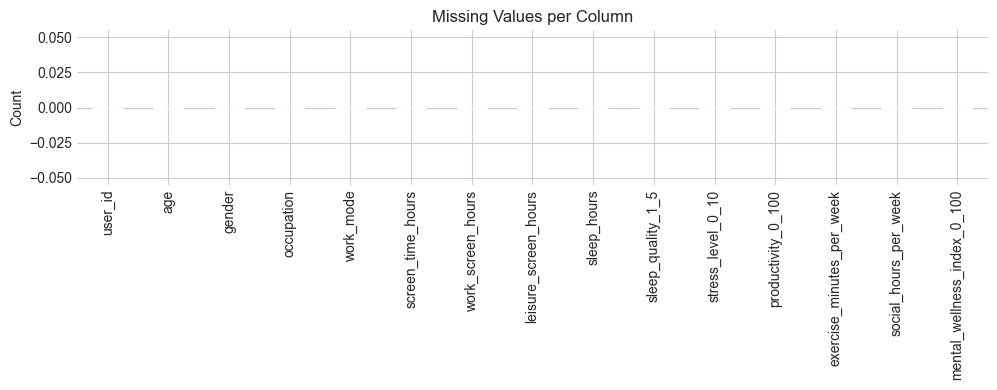


=== Outliers Detected (Z-score > 3) ===
age                            1
screen_time_hours              3
work_screen_hours              1
leisure_screen_hours           0
sleep_hours                    1
sleep_quality_1_5              3
stress_level_0_10              4
productivity_0_100             4
exercise_minutes_per_week      1
social_hours_per_week          1
mental_wellness_index_0_100    6
dtype: int64

=== Outliers Detected (IQR Method) ===
age: 1
screen_time_hours: 8
work_screen_hours: 15
leisure_screen_hours: 4
sleep_hours: 1
sleep_quality_1_5: 3
stress_level_0_10: 6
productivity_0_100: 7
exercise_minutes_per_week: 1
social_hours_per_week: 2
mental_wellness_index_0_100: 11


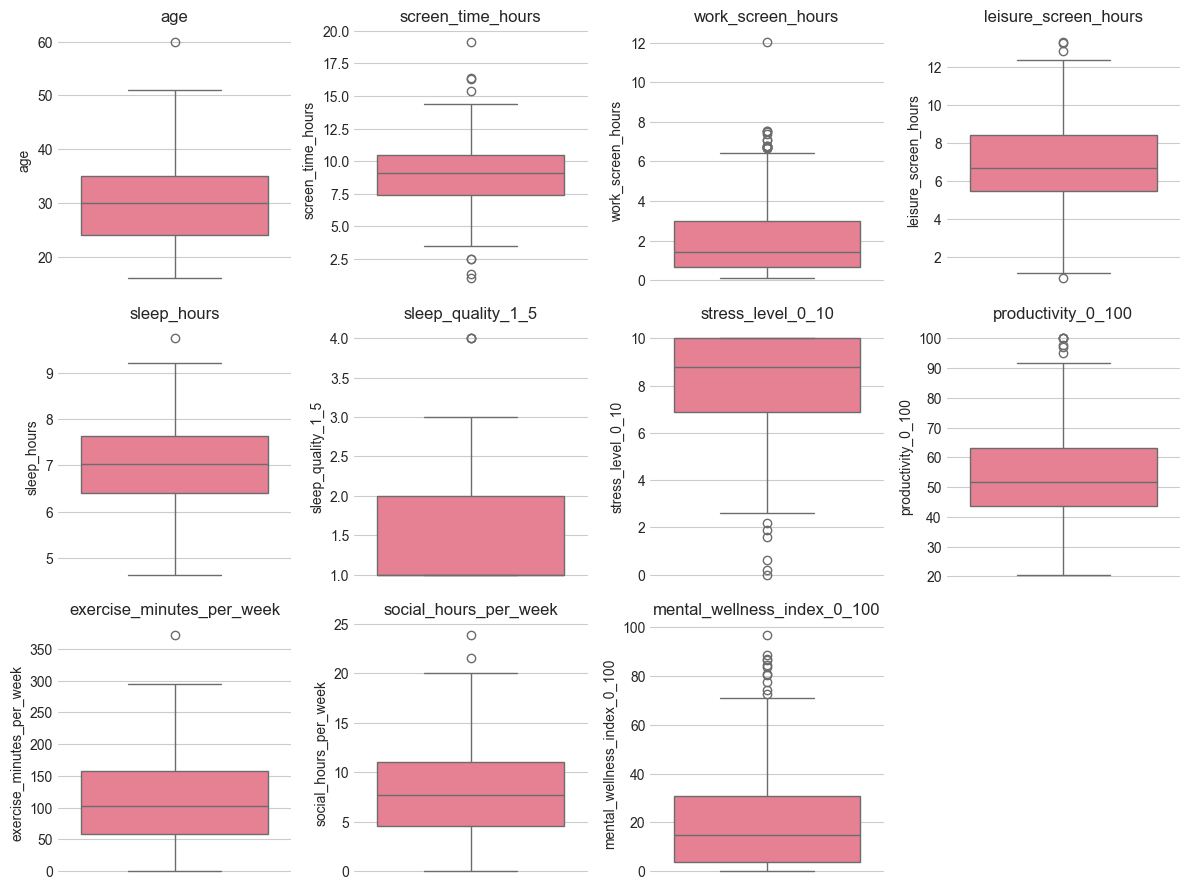

In [35]:
missing = df.isna().sum()

print("=== Missing Values ===")
print(missing)

plt.figure(figsize=(10, 4))
missing.plot(kind='bar', color='red')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


numeric = df.select_dtypes(include=['int64', 'float64'])

z_scores = (numeric - numeric.mean()) / numeric.std()

outliers_z = (np.abs(z_scores) > 3)

print("\n=== Outliers Detected (Z-score > 3) ===")
print(outliers_z.sum())



iqr_outliers = {}

for col in numeric.columns:
    Q1 = numeric[col].quantile(0.25)
    Q3 = numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_outliers[col] = numeric[(numeric[col] < lower) | (numeric[col] > upper)][col].count()

print("\n=== Outliers Detected (IQR Method) ===")
for k, v in iqr_outliers.items():
    print(f"{k}: {v}")


plt.figure(figsize=(12, 12))

for i, col in enumerate(numeric.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=numeric[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Univariate Analysis

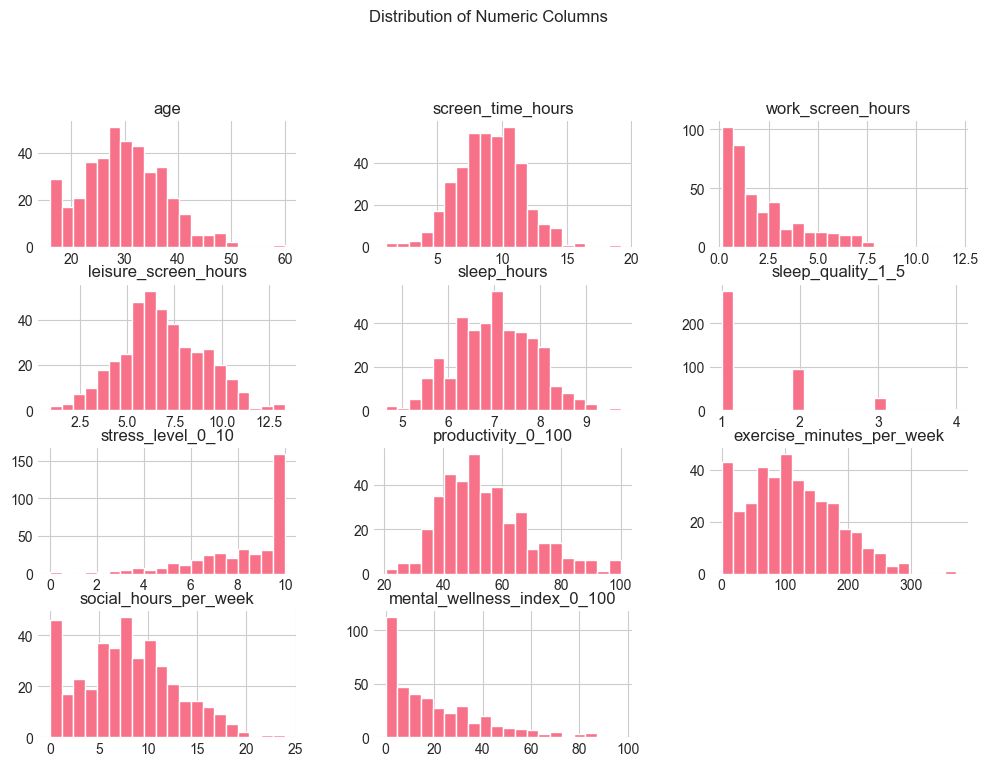

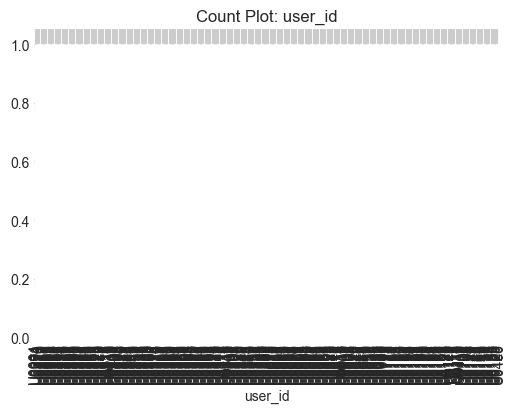

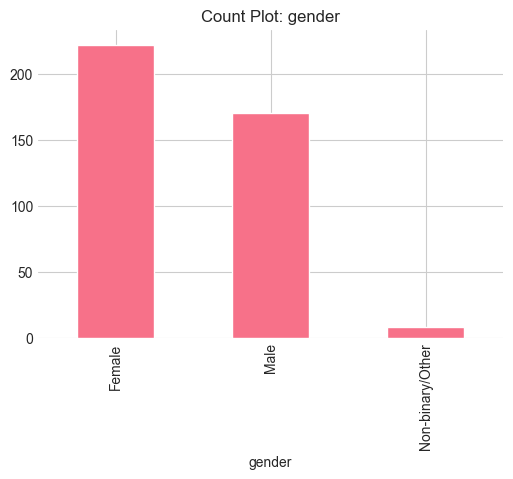

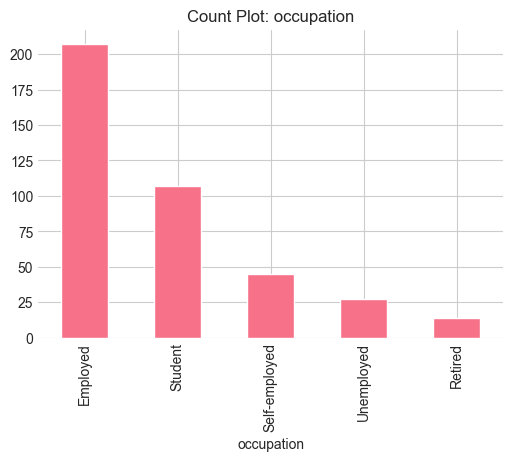

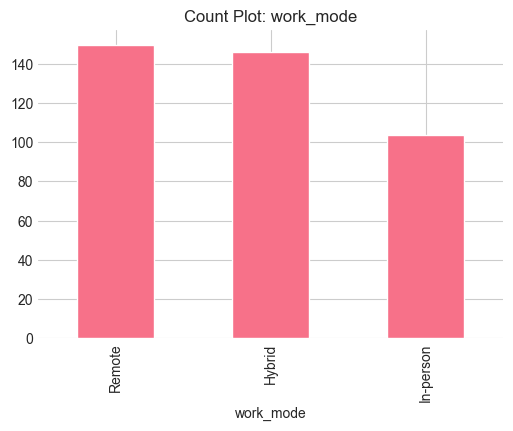

In [36]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Numeric Columns", y=1.02)
plt.show()

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Count Plot: {col}")
    plt.show()


## Correlation & Heatmap

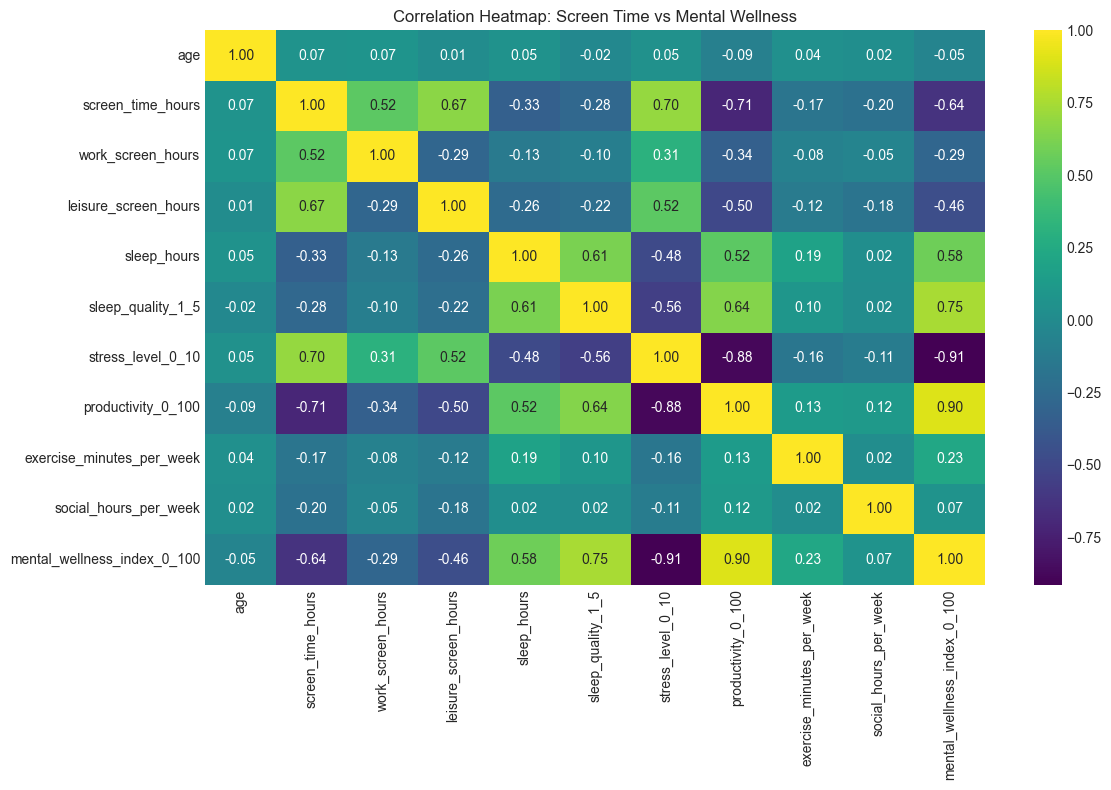

In [37]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap: Screen Time vs Mental Wellness")
plt.tight_layout()
plt.show()

## Conflicting category handling

In [38]:
# Check the number of conflicting rows before fixing
conflicts = df[
    (df['occupation'].isin(['Unemployed', 'Retired'])) &
    (df['work_mode'] != 'Unemployed')
]
print(f"Number of rows with conflicts: {len(conflicts)}")


# Apply the fix
df.loc[
    df['occupation'].isin(['Unemployed', 'Retired']),
    'work_mode'
] = 'Unemployed'


# Verify the fix
remaining_conflicts = df[
    (df['occupation'].isin(['Unemployed', 'Retired'])) &
    (df['work_mode'] != 'Unemployed')
]
print(f"Remaining conflicts: {len(remaining_conflicts)}")

Number of rows with conflicts: 41
Remaining conflicts: 0


## Clustering

DATASET OVERVIEW

Dataset shape: (400, 15)

Column names:
['user_id', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100']

Missing values:
user_id                        0
age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
work_screen_hours              0
leisure_screen_hours           0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64

Features for clustering: ['age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1

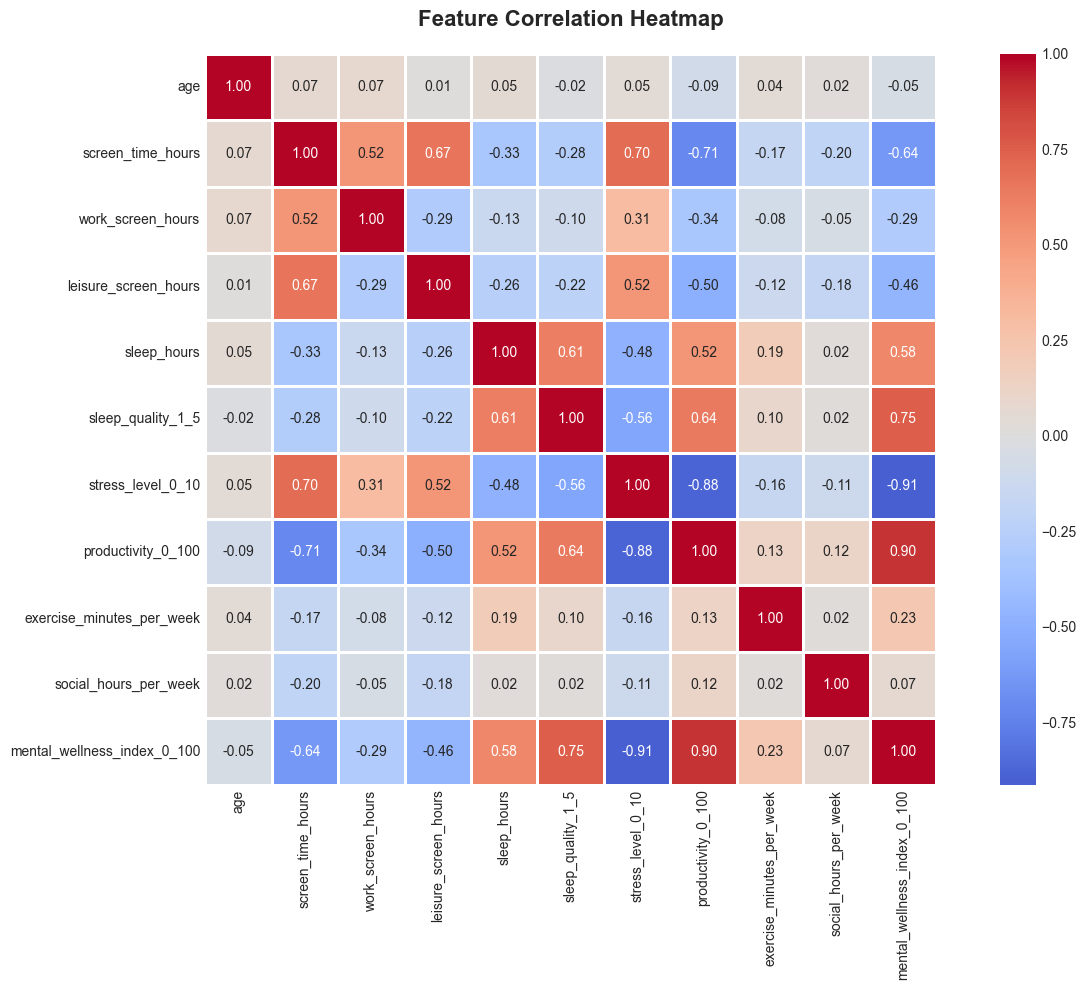

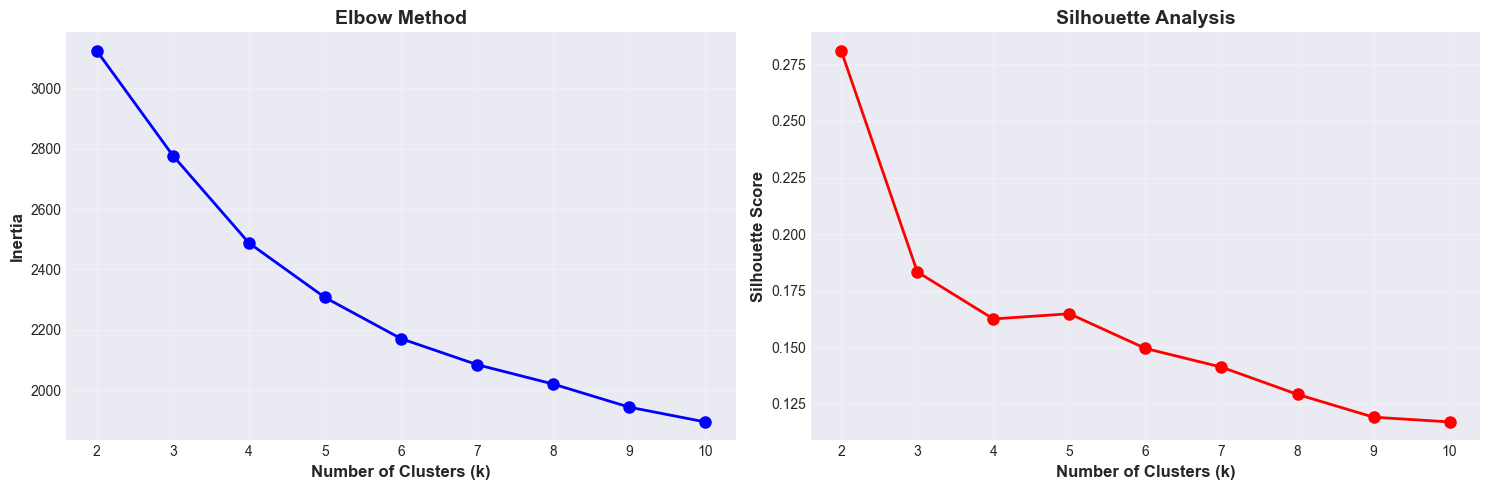


CLUSTERING RESULTS (k=10)

Cluster distribution:
cluster
0    41
1    18
2    56
3    50
4    47
5    48
6    37
7    29
8    41
9    33
Name: count, dtype: int64

PCA Explained Variance: 54.82%


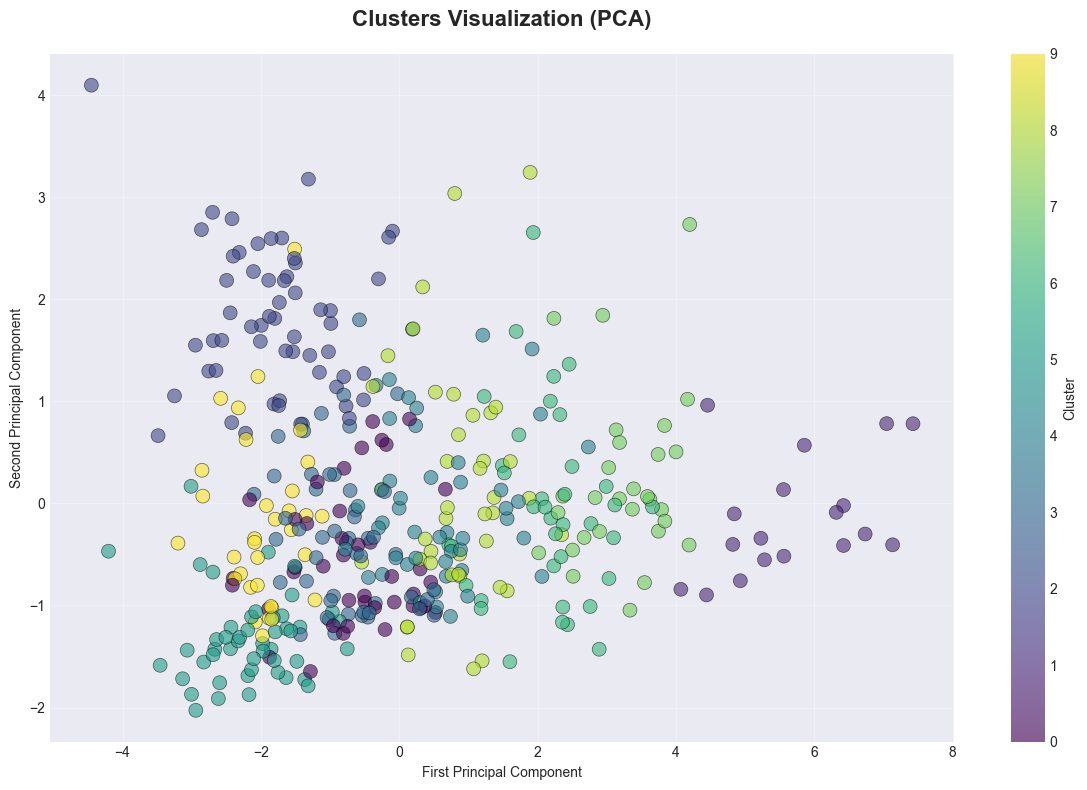


CLUSTER PROFILES (Mean Values)

           age  screen_time_hours  work_screen_hours  leisure_screen_hours  \
cluster                                                                      
0        28.80               9.43               1.47                  7.96   
1        25.39               5.00               0.79                  4.21   
2        30.84              11.48               5.76                  5.72   
3        29.84               8.66               1.72                  6.94   
4        29.02               7.12               1.46                  5.66   
5        28.73              11.45               1.17                 10.28   
6        27.70               6.58               1.50                  5.08   
7        32.76               6.50               1.42                  5.08   
8        32.93               9.53               2.33                  7.20   
9        29.88              10.62               2.22                  8.39   

         sleep_hours  sleep_qu

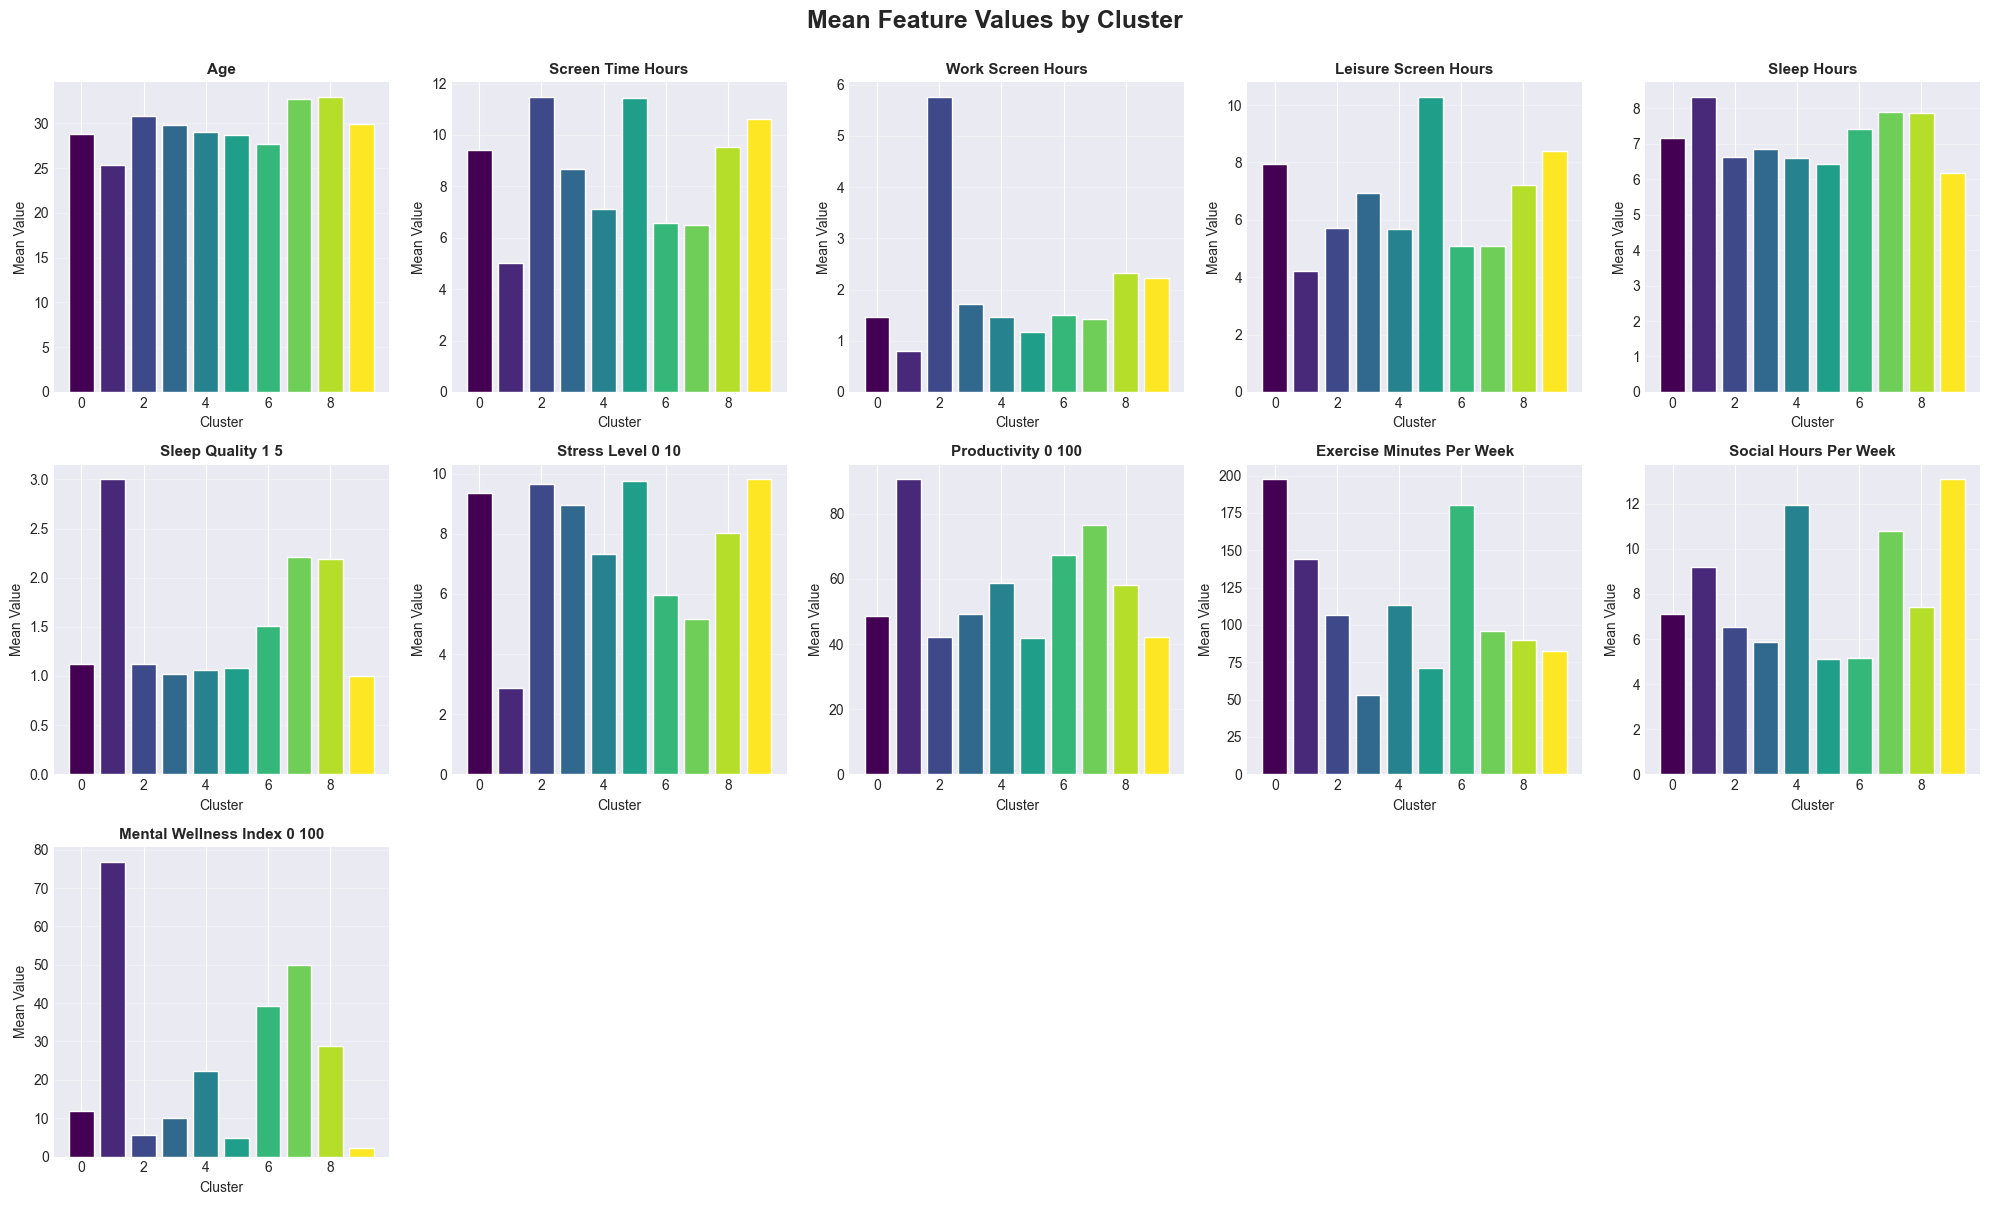

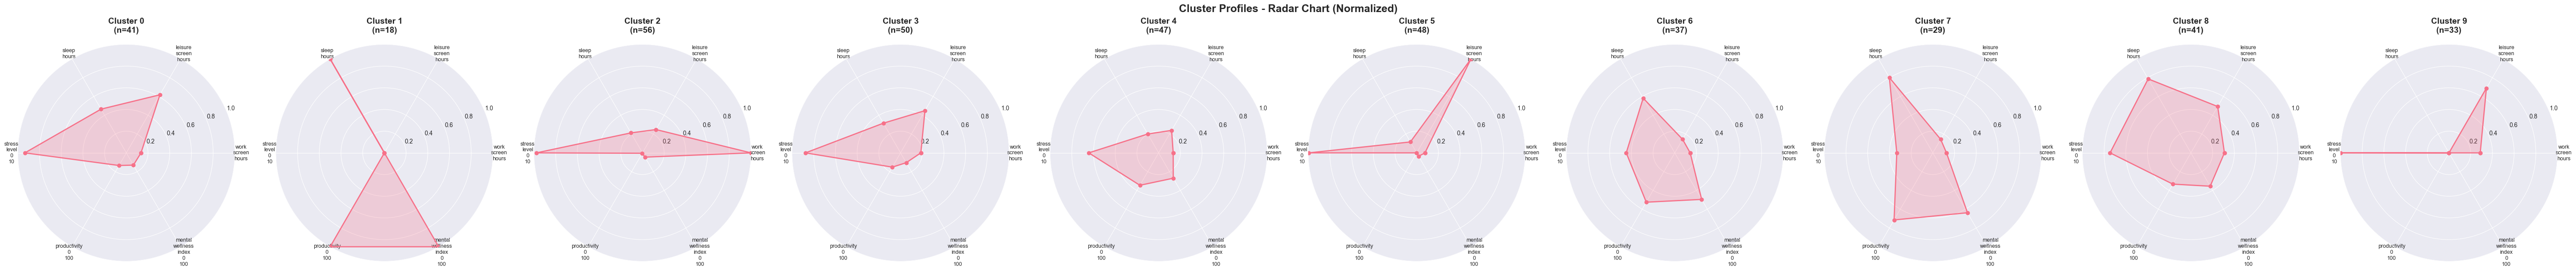

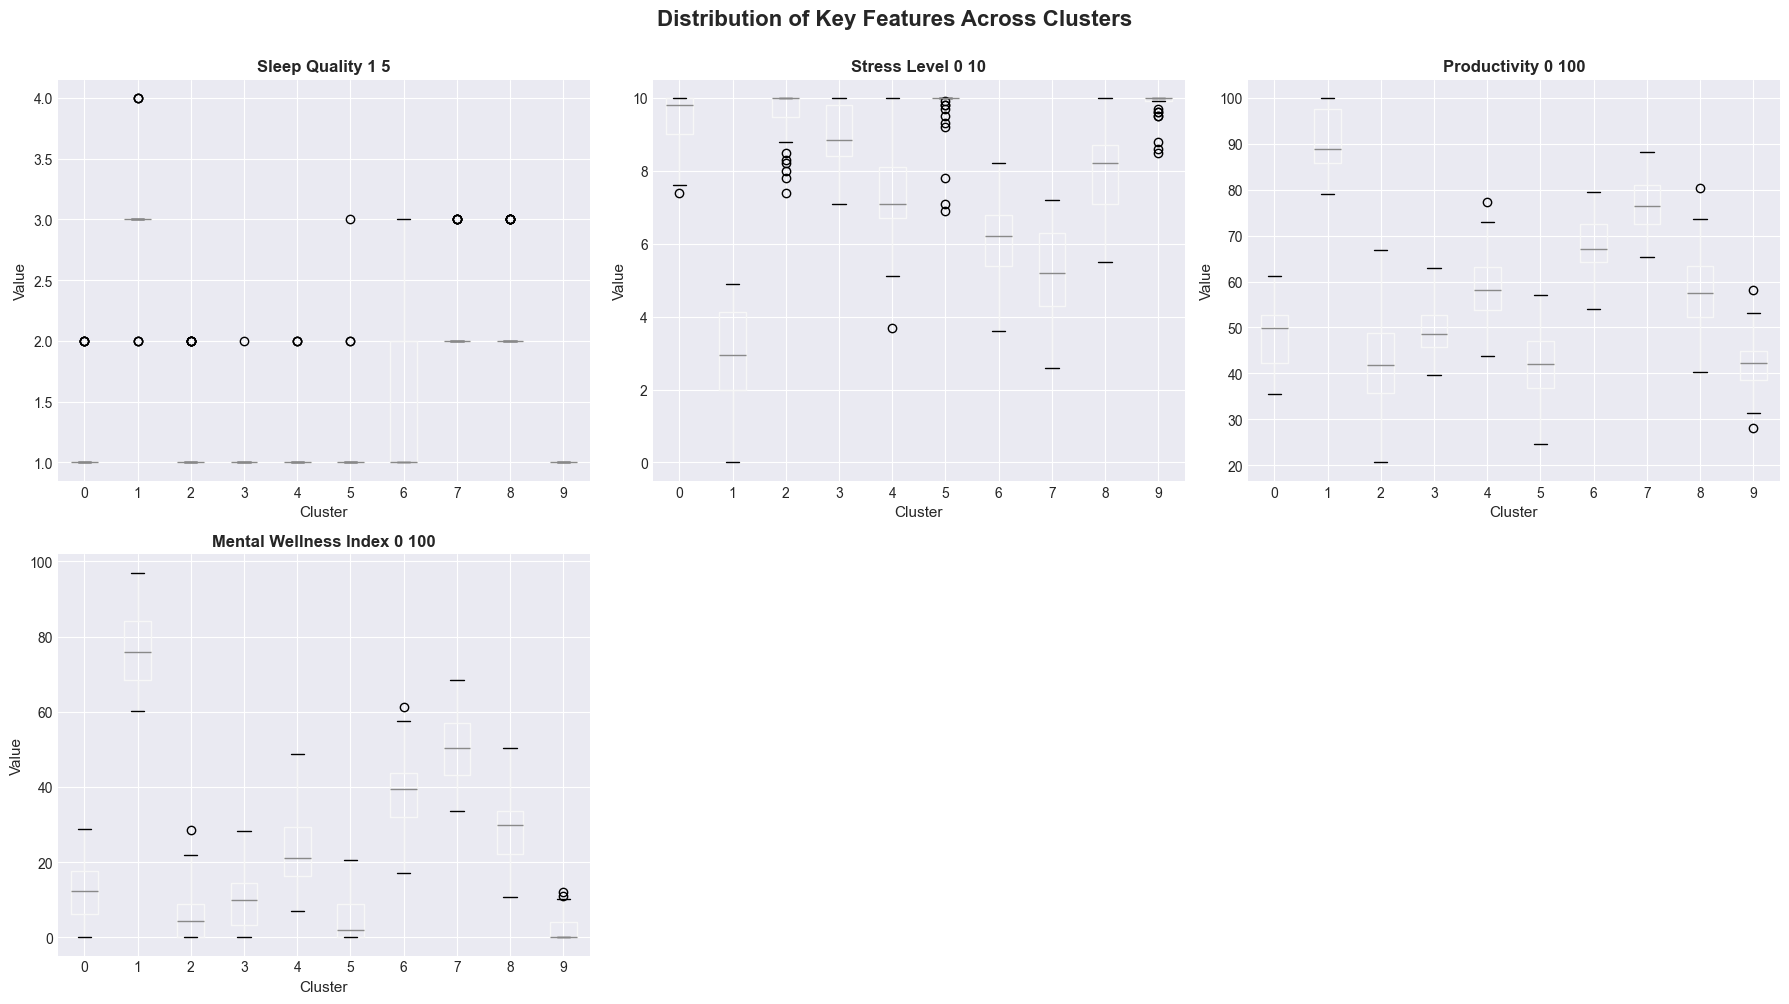


MENTAL WELLNESS CLUSTER CATEGORIZATION

Cluster    Category        Avg Score    Range                Count   
------------------------------------------------------------------------------------------
9          Dangerous       2.24         0.0 - 12.0        33      
5          Dangerous       4.95         0.0 - 20.7        48      
2          Not Healthy     5.64         0.0 - 28.6        56      
3          Not Healthy     10.05        0.0 - 28.3        50      
0          Not Healthy     11.98        0.0 - 28.9        41      
4          Average         22.39        7.0 - 48.7        47      
8          Average         28.74        10.7 - 50.3        41      
6          Average         39.22        17.2 - 61.4        37      
7          Healthy         49.82        33.6 - 68.4        29      
1          Healthy         76.86        60.1 - 97.0        18      

COMPREHENSIVE CLUSTER CHARACTERISTICS - ALL FEATURES


────────────────────────────────────────────────────────────────────

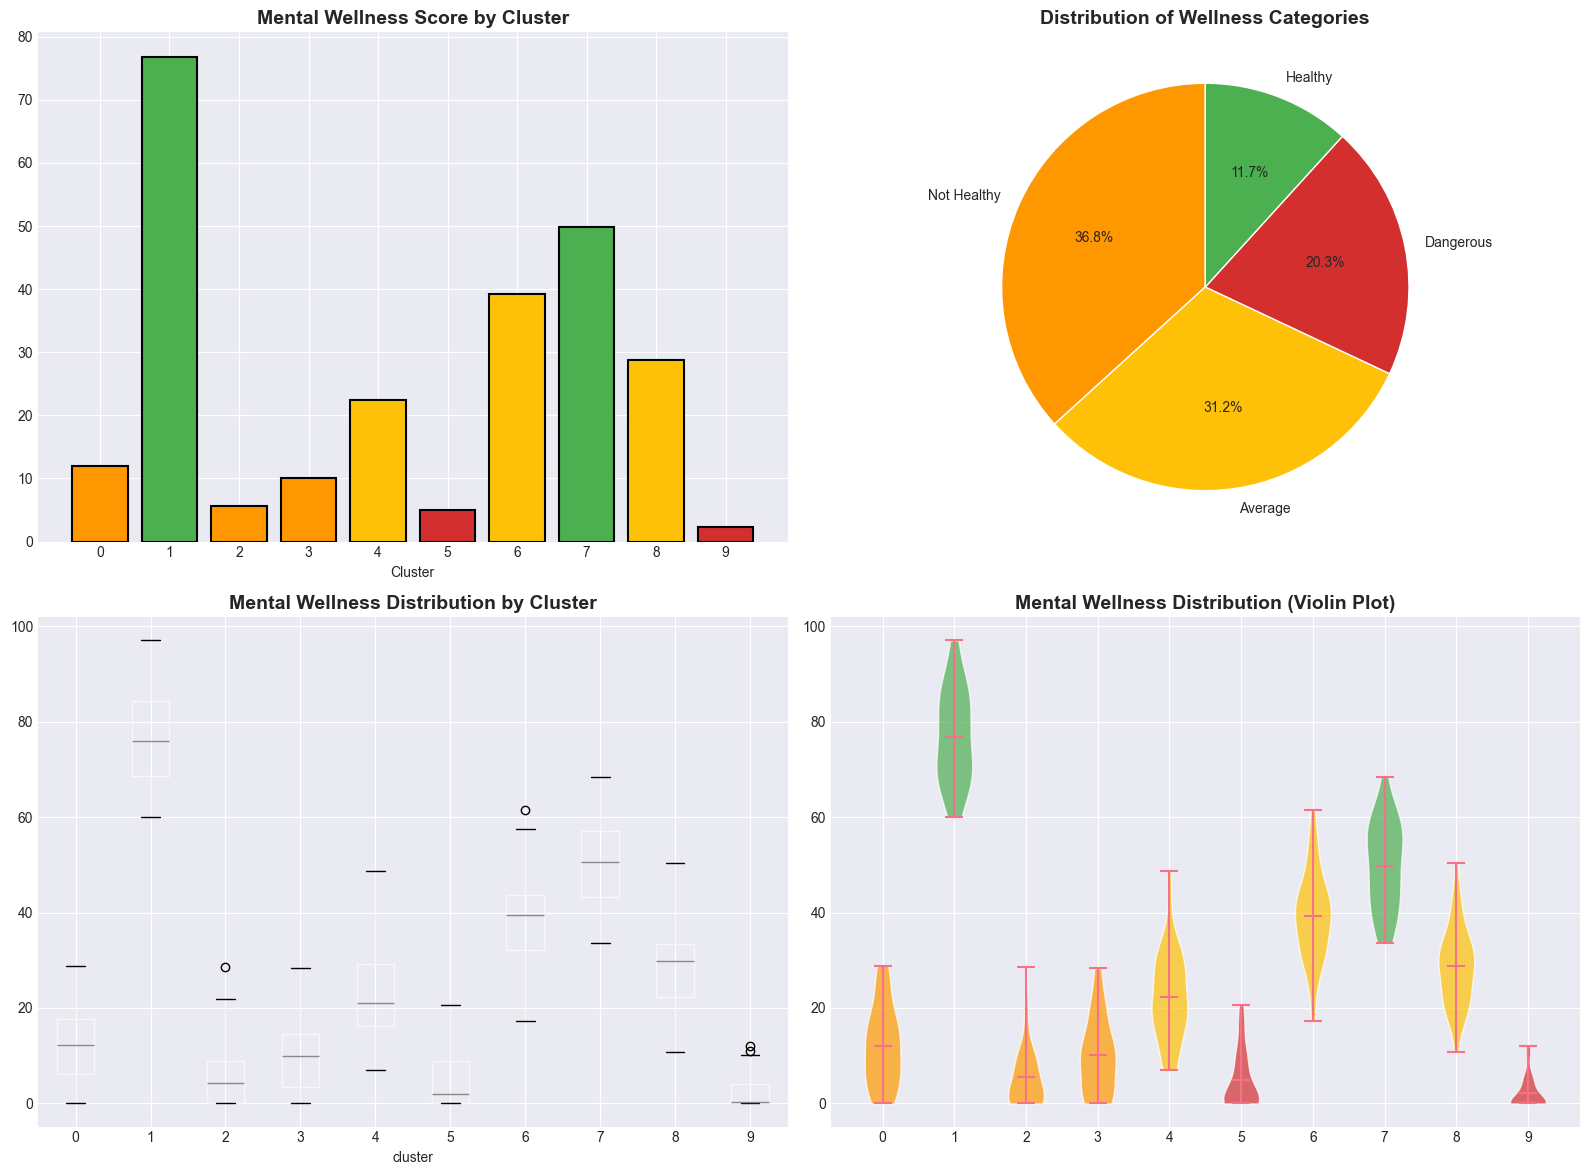


RECOMMENDATIONS BY CLUSTER

CLUSTER 0 - Not Healthy:
ACTION: Focus on stress reduction and work-life balance.

CLUSTER 1 - Healthy:

CLUSTER 2 - Not Healthy:
ACTION: Focus on stress reduction and work-life balance.

CLUSTER 3 - Not Healthy:
ACTION: Focus on stress reduction and work-life balance.

CLUSTER 4 - Average:

CLUSTER 5 - Dangerous:
URGENT: Professional support recommended.
  • Prioritize sleep (Currently low: 6.4 hrs)

CLUSTER 6 - Average:

CLUSTER 7 - Healthy:

CLUSTER 8 - Average:

CLUSTER 9 - Dangerous:
URGENT: Professional support recommended.
  • Prioritize sleep (Currently low: 6.2 hrs)

Analysis Complete. 'df' is untouched. Results are in 'df_cluster'.


In [39]:


warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================
# 1. DATA EXPLORATION (Read-only from df)
# ============================================

print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nMissing values:\n{df.isnull().sum()}")

# ============================================
# 2. DATA PREPARATION
# ============================================

# Select features for clustering (excluding user_id or non-numeric columns)
# Adjust 'user_id' to whatever identifier column you have, or remove .drop() if not needed
if 'user_id' in df.columns:
    features = df.drop('user_id', axis=1).select_dtypes(include=[np.number])
else:
    features = df.select_dtypes(include=[np.number])

feature_names = features.columns.tolist()
print(f"\nFeatures for clustering: {feature_names}")

# Handle missing values (using median imputation for robustness)
features = features.fillna(features.median())

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=feature_names)

# ============================================
# 3. CORRELATION ANALYSIS
# ============================================

fig, ax = plt.subplots(figsize=(14, 10))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ============================================
# 4. DETERMINE OPTIMAL NUMBER OF CLUSTERS
# ============================================

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plot Elbow and Silhouette
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertia', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 5. APPLY K-MEANS CLUSTERING & CREATE df_cluster
# ============================================

# Choose optimal k (Defaulting to 10 based on previous context, adjust if needed)
optimal_k = 10 

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)

# *** CRITICAL: Create separate dataframe for analysis ***
# We use .copy() because "df_cluster = df" creates a reference, not a duplicate.
# .copy() ensures 'df' is NOT modified when we add columns to 'df_cluster'.
df_cluster = df.copy()

# Add cluster labels to the NEW dataframe
df_cluster['cluster'] = clusters

print(f"\n{'=' * 50}")
print(f"CLUSTERING RESULTS (k={optimal_k})")
print(f"{'=' * 50}")
print(f"\nCluster distribution:")
print(df_cluster['cluster'].value_counts().sort_index())

# ============================================
# 6. PCA FOR VISUALIZATION
# ============================================

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Explained variance
print(f"\nPCA Explained Variance: {sum(pca.explained_variance_ratio_):.2%}")

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                      c=pca_df['cluster'], 
                      cmap='viridis', 
                      s=100, 
                      alpha=0.6, 
                      edgecolors='black',
                      linewidth=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters Visualization (PCA)', fontsize=16, fontweight='bold', pad=20)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================
# 7. CLUSTER CHARACTERISTICS (Using df_cluster)
# ============================================

# Calculate mean values using df_cluster
cluster_profiles = df_cluster.groupby('cluster')[feature_names].mean()

print(f"\n{'=' * 50}")
print("CLUSTER PROFILES (Mean Values)")
print(f"{'=' * 50}\n")
print(cluster_profiles.round(2))

# Visualize cluster profiles
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.ravel()

for idx, feature in enumerate(feature_names):
    if idx < len(axes):
        # Grouping on df_cluster
        cluster_means = df_cluster.groupby('cluster')[feature].mean()
        axes[idx].bar(cluster_means.index, cluster_means.values, 
                      color=plt.cm.viridis(np.linspace(0, 1, optimal_k)))
        axes[idx].set_title(feature.replace('_', ' ').title(), 
                            fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Cluster', fontsize=10)
        axes[idx].set_ylabel('Mean Value', fontsize=10)
        axes[idx].grid(True, alpha=0.3, axis='y')

# Remove empty subplots
for idx in range(len(feature_names), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Mean Feature Values by Cluster', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# ============================================
# 8. RADAR CHART (Using cluster_profiles)
# ============================================

# Normalize cluster profiles (0-1 scale)
cluster_profiles_norm = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

# Select top features for radar chart
# REMOVED 'screen_time_hours' from top_features
top_features = ['work_screen_hours', 'leisure_screen_hours', 
                'sleep_hours', 'stress_level_0_10', 'productivity_0_100',
                'mental_wellness_index_0_100']
# Filter to ensure they exist in data
top_features = [f for f in top_features if f in feature_names]

fig, axes = plt.subplots(1, optimal_k, figsize=(6*optimal_k, 6), 
                         subplot_kw=dict(projection='polar'))

if optimal_k == 1:
    axes = [axes]

angles = np.linspace(0, 2 * np.pi, len(top_features), endpoint=False).tolist()
angles += angles[:1]

for cluster_id, ax in enumerate(axes):
    values = cluster_profiles_norm.loc[cluster_id, top_features].tolist()
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster_id}')
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([f.replace('_', '\n') for f in top_features], fontsize=9)
    ax.set_ylim(0, 1)
    ax.set_title(f'Cluster {cluster_id}\n(n={sum(clusters == cluster_id)})', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(True)

plt.suptitle('Cluster Profiles - Radar Chart (Normalized)', 
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================
# 9. BOX PLOTS (Using df_cluster)
# ============================================

# REMOVED 'screen_time_hours' from key_features
key_features = ['sleep_quality_1_5', 'stress_level_0_10', 
                'productivity_0_100', 'mental_wellness_index_0_100']
key_features = [f for f in key_features if f in feature_names]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    if idx < len(axes):
        # Using df_cluster
        df_cluster.boxplot(column=feature, by='cluster', ax=axes[idx])
        axes[idx].set_title(feature.replace('_', ' ').title(), 
                            fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Cluster', fontsize=11)
        axes[idx].set_ylabel('Value', fontsize=11)
        axes[idx].get_figure().suptitle('')

for idx in range(len(key_features), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribution of Key Features Across Clusters', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# ============================================
# 10. MENTAL WELLNESS CATEGORIZATION (Using df_cluster)
# ============================================

print(f"\n{'=' * 60}")
print("MENTAL WELLNESS CLUSTER CATEGORIZATION")
print(f"{'=' * 60}\n")

# Calculate stats using df_cluster
cluster_mental_wellness = df_cluster.groupby('cluster')['mental_wellness_index_0_100'].agg(['mean', 'std', 'min', 'max', 'count'])
cluster_mental_wellness_sorted = cluster_mental_wellness.sort_values('mean')
sorted_cluster_ids = cluster_mental_wellness_sorted.index.tolist()

# Assign categories based on actual cluster ranking
if optimal_k == 10:
    category_assignment = ['Dangerous', 'Dangerous', 'Not Healthy', 'Not Healthy', 'Not Healthy', 
                           'Average', 'Average', 'Average', 'Healthy', 'Healthy']
else:
    # Dynamic logic for other K values
    category_assignment = []
    dangerous_count = max(1, optimal_k // 5)
    healthy_count = max(1, optimal_k // 5)
    remaining = optimal_k - dangerous_count - healthy_count
    not_healthy_count = remaining // 2
    average_count = remaining - not_healthy_count
    
    category_assignment.extend(['Dangerous'] * dangerous_count)
    category_assignment.extend(['Not Healthy'] * not_healthy_count)
    category_assignment.extend(['Average'] * average_count)
    category_assignment.extend(['Healthy'] * healthy_count)

# Create mapping
cluster_categories = {}
for idx, cluster_id in enumerate(sorted_cluster_ids):
    category = category_assignment[idx]
    cluster_categories[cluster_id] = {
        'category': category,
        'avg_score': cluster_mental_wellness.loc[cluster_id, 'mean']
    }

# Add wellness category to df_cluster (NOT df)
df_cluster['wellness_category'] = df_cluster['cluster'].map(lambda x: cluster_categories[x]['category'])

# Detailed Breakdown
print(f"{'Cluster':<10} {'Category':<15} {'Avg Score':<12} {'Range':<20} {'Count':<8}")
print("-" * 90)

for cluster_id in sorted_cluster_ids:
    info = cluster_categories[cluster_id]
    row = cluster_mental_wellness.loc[cluster_id]
    print(f"{cluster_id:<10} {info['category']:<15} {info['avg_score']:<12.2f} "
          f"{row['min']:.1f} - {row['max']:.1f}{'':<7} {int(row['count']):<8}")



# ============================================
# 10.5. COMPREHENSIVE CLUSTER CHARACTERISTICS TABLE
# ============================================

print(f"\n{'=' * 100}")
print("COMPREHENSIVE CLUSTER CHARACTERISTICS - ALL FEATURES")
print(f"{'=' * 100}\n")

# Create a detailed table for all numeric features
all_numeric_features = [f for f in feature_names if f in df_cluster.columns]

for cluster_id in sorted_cluster_ids:
    category = cluster_categories[cluster_id]['category']
    cluster_data = df_cluster[df_cluster['cluster'] == cluster_id]
    count = len(cluster_data)
    
    print(f"\n{'─' * 100}")
    print(f"CLUSTER {cluster_id} - {category.upper()} (n={count})")
    print(f"{'─' * 100}")
    print(f"{'Feature':<35} {'Mean':<12} {'Std':<12} {'Min':<12} {'Max':<12} {'Range':<15}")
    print(f"{'─' * 100}")
    
    for feature in all_numeric_features:
        stats = cluster_data[feature].agg(['mean', 'std', 'min', 'max'])
        range_val = f"{stats['min']:.1f} - {stats['max']:.1f}"
        print(f"{feature:<35} {stats['mean']:<12.2f} {stats['std']:<12.2f} "
              f"{stats['min']:<12.2f} {stats['max']:<12.2f} {range_val:<15}")
    
    # Highlight key characteristics
    print(f"\n{'KEY CHARACTERISTICS:':>35}")
    
    # Sleep assessment
    if 'sleep_hours' in cluster_data.columns:
        avg_sleep = cluster_data['sleep_hours'].mean()
        sleep_category = "Excellent" if avg_sleep >= 8 else "Good" if avg_sleep >= 7 else "Fair" if avg_sleep >= 6 else "Poor"
        print(f"{'Sleep:':<35} {sleep_category} ({avg_sleep:.1f} hrs/night)")
    
    # Stress assessment
    if 'stress_level_0_10' in cluster_data.columns:
        avg_stress = cluster_data['stress_level_0_10'].mean()
        stress_category = "Very High" if avg_stress >= 8 else "High" if avg_stress >= 6 else "Moderate" if avg_stress >= 4 else "Low"
        print(f"{'Stress Level:':<35} {stress_category} ({avg_stress:.1f}/10)")
    
    # Productivity assessment
    if 'productivity_0_100' in cluster_data.columns:
        avg_prod = cluster_data['productivity_0_100'].mean()
        prod_category = "Excellent" if avg_prod >= 80 else "Good" if avg_prod >= 60 else "Fair" if avg_prod >= 40 else "Low"
        print(f"{'Productivity:':<35} {prod_category} ({avg_prod:.1f}/100)")

print(f"\n{'=' * 100}")
print("END OF COMPREHENSIVE CLUSTER ANALYSIS")
print(f"{'=' * 100}\n")

# ============================================
# 11. VISUALIZATION: MENTAL WELLNESS (Using df_cluster)
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Colors
colors_map = {'Dangerous': '#d32f2f', 'Not Healthy': '#ff9800', 'Average': '#ffc107', 'Healthy': '#4caf50'}
bar_colors = [colors_map[cluster_categories[i]['category']] for i in range(optimal_k)]

# 1. Bar chart
ax1 = axes[0, 0]
bars = ax1.bar(range(optimal_k), 
               [cluster_categories[i]['avg_score'] for i in range(optimal_k)],
               color=bar_colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Mental Wellness Score by Cluster', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cluster')
ax1.set_xticks(range(optimal_k))

# 2. Pie chart (Using df_cluster)
ax2 = axes[0, 1]
category_counts = df_cluster['wellness_category'].value_counts()
colors = [colors_map[cat] for cat in category_counts.index]
ax2.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Distribution of Wellness Categories', fontsize=14, fontweight='bold')

# 3. Box plot (Using df_cluster)
ax3 = axes[1, 0]
df_cluster.boxplot(column='mental_wellness_index_0_100', by='cluster', ax=ax3)
ax3.set_title('Mental Wellness Distribution by Cluster', fontsize=14, fontweight='bold')
ax3.get_figure().suptitle('')

# 4. Violin plot (Using df_cluster)
ax4 = axes[1, 1]
cluster_wellness_data = [df_cluster[df_cluster['cluster'] == i]['mental_wellness_index_0_100'].values 
                         for i in range(optimal_k)]
parts = ax4.violinplot(cluster_wellness_data, positions=range(optimal_k), showmeans=True)

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(bar_colors[i])
    pc.set_alpha(0.7)
ax4.set_title('Mental Wellness Distribution (Violin Plot)', fontsize=14, fontweight='bold')
ax4.set_xticks(range(optimal_k))

plt.tight_layout()
plt.show()

# ============================================
# 12. RECOMMENDATIONS (Using df_cluster)
# ============================================

print(f"\n{'=' * 60}")
print("RECOMMENDATIONS BY CLUSTER")
print(f"{'=' * 60}\n")

for cluster_id in range(optimal_k):
    category = cluster_categories[cluster_id]['category']
    # Using df_cluster for specific insights
    cluster_data = df_cluster[df_cluster['cluster'] == cluster_id]
    
    print(f"CLUSTER {cluster_id} - {category}:")
    
    # Recommendations logic
    if category == 'Dangerous':
        print("URGENT: Professional support recommended.")
    elif category == 'Not Healthy':
        print("ACTION: Focus on stress reduction and work-life balance.")
    
    # Data-driven suggestions
    if 'sleep_hours' in feature_names:
        avg_sleep = cluster_data['sleep_hours'].mean()
        if avg_sleep < 6.5:
            print(f"  • Prioritize sleep (Currently low: {avg_sleep:.1f} hrs)")
            
    print()

print("=" * 60)
print("Analysis Complete. 'df' is untouched. Results are in 'df_cluster'.")
print("=" * 60)

## Pairplot

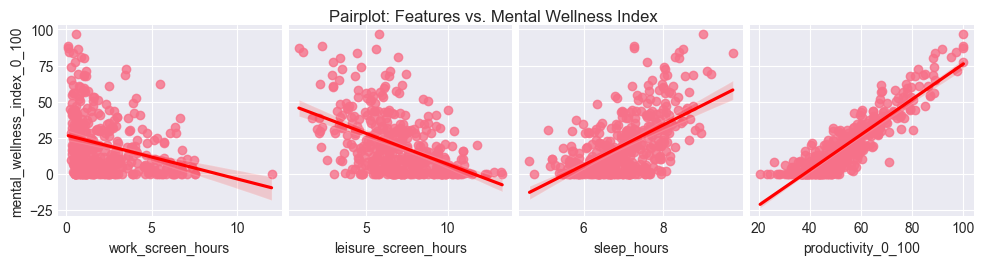

In [40]:
pair_features = [
 'work_screen_hours', 'leisure_screen_hours',
 'sleep_hours', 'productivity_0_100', 'mental_wellness_index_0_100'
]

sns.pairplot(df[pair_features], 
             x_vars=pair_features[:-1], 
             y_vars=[pair_features[-1]], 
             kind='reg', 
             plot_kws={'line_kws':{'color':'red'}}
            )
plt.suptitle("Pairplot: Features vs. Mental Wellness Index", y=1.02)
plt.show()

# Preprocessing

In [41]:
class IQROutlierCapper(BaseEstimator, TransformerMixin):
    """
    A transformer to cap outliers using the IQR method.
    Learns boundaries from training data (fit) and applies them (transform).
    """
    def __init__(self, k=1.5):
        self.k = k
        self.boundaries_ = {}
        self.feature_names_in_ = None # To store column names

    def fit(self, X, y=None):
        """
        Learn the Q1, Q3, and boundaries from the training data.
        X is expected to be a DataFrame or an array.
        """
        # Convert X to DataFrame to get column names and use .quantile()
        if isinstance(X, np.ndarray):
            # If it's a numpy array, we can't get names.
            # We'll just use indices, assuming order is consistent.
            X_df = pd.DataFrame(X)
            self.feature_names_in_ = list(range(X_df.shape[1]))
        elif isinstance(X, pd.DataFrame):
            X_df = X
            self.feature_names_in_ = X_df.columns.to_list()
        else:
            raise TypeError("Input must be a pandas DataFrame or NumPy array.")

        
        for col in self.feature_names_in_:
            Q1 = X_df[col].quantile(0.25)
            Q3 = X_df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - self.k * IQR
            upper_bound = Q3 + self.k * IQR
            
            # Store the learned boundaries for this column/index
            self.boundaries_[col] = (lower_bound, upper_bound)
            
        return self  # fit must always return self

    def transform(self, X):
        """
        Apply the learned boundaries to cap the data.
        X can be X_train or X_test (as DataFrame or array).
        """
        # We need to work with a copy to avoid changing the original data
        X_copy = X.copy()
        
        # Ensure X is a DataFrame for .clip()
        if isinstance(X_copy, np.ndarray):
            X_copy = pd.DataFrame(X_copy, columns=self.feature_names_in_)

        for col in self.feature_names_in_:
            if col not in self.boundaries_:
                raise ValueError(f"Column '{col}' was not seen during fit.")
                
            lower_bound, upper_bound = self.boundaries_[col]
            
            # Use .clip() to cap the values
            X_copy[col] = X_copy[col].clip(lower=lower_bound, upper=upper_bound)
            
        # Return a NumPy array, as subsequent pipeline steps expect
        return X_copy.values

## Pipeline

In [42]:
feature_cols = [
    'age', 'gender', 'occupation', 'work_mode',
    'work_screen_hours', 'leisure_screen_hours',
    'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10',
    'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week'
]

X = df[feature_cols]
y = df['mental_wellness_index_0_100']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==========================================
# 1. DEFINISI BINNING LOGIC (The Cleaner)
# ==========================================
def clean_occupation_column(df):
    """
    Mendeteksi kolom 'occupation' dan menggabungkan
    kategori jarang (Unemployed, Retired) menjadi 'Other'.
    """
    df_copy = df.copy()
    if 'occupation' in df_copy.columns:
        df_copy['occupation'] = df_copy['occupation'].replace(
            ['Unemployed', 'Retired'], 'Unemployed'
        )
    return df_copy

# Bungkus logic ini agar bisa masuk ke Pipeline scikit-learn
binning_transformer = FunctionTransformer(clean_occupation_column, validate=False)

# ==========================================
# 2. DEFINISI TRANSFORMERS
# ==========================================
numerical_cols = [
    'age', 'work_screen_hours', 'leisure_screen_hours',
    'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10',
    'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week'
]

categorical_cols = ['gender', 'occupation', 'work_mode']

# A. Numerical Transformer (REORDERED: Yeo-Johnson FIRST, then Poly)
# Alasan: Kita normalkan dulu sebarannya, baru kita kuadratkan. 
# Jika dikuadratkan dulu (Poly first), angka skewed akan meledak jadi raksasa.
numerical_transformer = Pipeline([
    ('transform_skew', PowerTransformer(method='yeo-johnson')),
    ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False))
])

# B. Categorical Transformer
categorical_transformer = OneHotEncoder(
    drop='first', handle_unknown='ignore', sparse_output=False
)

# C. Preprocessor Awal
preprocessor_raw = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)

# ==========================================
# 3. MEMBUAT SMART PREPROCESSOR (GABUNGAN)
# ==========================================
print("\n=== Membangun Smart Preprocessor ===")

alphas = np.logspace(-4, 2, 100)
lasso_engine = LassoCV(
    alphas=alphas,
    cv=5,
    max_iter=10000,
    random_state=42,
    n_jobs=-1
)

smart_preprocessor = Pipeline([
    # Langkah 0: Binning (Otomatis ubah Retired/Unemployed -> Other)
    ('cleaner', binning_transformer),

    # Langkah 1: Ubah data mentah jadi angka (Poly + Yeo + OHE)
    ('prepare_data', preprocessor_raw), 
    
    # Langkah 1.5: Global Scaling (CRITICAL untuk Lasso)
    # Agar fitur hasil OneHot (0-1) dan Poly (varian tinggi) diperlakukan adil
    ('global_scaler', StandardScaler()),

    # Langkah 2: Pilih fitur terbaik
    ('feature_selection', SelectFromModel(lasso_engine)) 
])

# ==========================================
# 4. EKSEKUSI & VERIFIKASI
# ==========================================

print("Fitting Smart Preprocessor pada x_train...")
# Pipeline akan menjalankan: cleaner -> preprocessor -> scaler -> lasso selection
x_train_final = smart_preprocessor.fit_transform(x_train, y_train)
x_test_final = smart_preprocessor.transform(x_test)

print("\n=== Laporan Seleksi Fitur ===")
# Note: Kita ambil n_features dari step 'prepare_data' karena 'cleaner' & 'global_scaler' tidak mengubah jumlah kolom
n_features_original = smart_preprocessor.named_steps['prepare_data'].transform(x_train[:5]).shape[1]
n_features_selected = x_train_final.shape[1]

print(f"Fitur Awal (setelah Poly & OHE): {n_features_original}")
print(f"Fitur Terpilih (setelah Lasso) : {n_features_selected}")
print(f"Fitur Dibuang                    : {n_features_original - n_features_selected}")
print(f"Persentase yang dijaga           : {100 * n_features_selected / n_features_original:.2f}%")

best_alpha = smart_preprocessor.named_steps['feature_selection'].estimator_.alpha_
print(f"Best Lasso Alpha used            : {best_alpha:.6f}")


=== Membangun Smart Preprocessor ===
Fitting Smart Preprocessor pada x_train...

=== Laporan Seleksi Fitur ===
Fitur Awal (setelah Poly & OHE): 62
Fitur Terpilih (setelah Lasso) : 11
Fitur Dibuang                    : 51
Persentase yang dijaga           : 17.74%
Best Lasso Alpha used            : 0.657933


# Model

In [43]:
# from google.colab import drive
# drive.mount('/content/drive')
# # Kalau mau akses drive aja

## Model Comparison (Default Parameters)

In [44]:
# Define all models with default parameters
models = {
    'Linear Regression': LinearRegression(),
    'LassoCV': LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42, n_jobs=-1),
    'RidgeCV': RidgeCV(alphas=alphas, cv=5),
    'ElasticNetCV': ElasticNetCV(alphas=alphas, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99], cv=5, max_iter=10000, random_state=42, n_jobs=-1),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'XGBRegressor': XGBRegressor(random_state=42),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, verbose=False)
}

results = []

def print_metrics(model_name, y_true, y_pred, set_type="Train"):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_true, y_pred)

    print(f"  {set_type} R^2: {r2:.6f}")
    print(f"  {set_type} MSE: {mse:.6f}")
    print(f"  {set_type} RMSE: {rmse:.6f}")
    print(f"  {set_type} MAE: {mae:.6f}")

    return r2, mse, rmse, mae


for name, model in models.items():
    print(f"\n--- Training {name} ---")

    start_time = time.time()
    
    # Train on SELECTED features
    model.fit(x_train_final, y_train)
    
    end_time = time.time()
    training_time = end_time - start_time
    print(f"  Training Time: {training_time:.2f}s")

    # Train predictions
    y_train_pred = model.predict(x_train_final)
    print("--- Train Scores ---")
    train_r2, train_mse, train_rmse, train_mae = print_metrics(name, y_train, y_train_pred, set_type="Train")

    # Test predictions
    y_test_pred = model.predict(x_test_final)
    print("--- Test Scores ---")
    test_r2, test_mse, test_rmse, test_mae = print_metrics(name, y_test, y_test_pred, set_type="Test")

    # Store results
    results.append({
        'Model': name,
        'Train R^2': train_r2,
        'Test R^2': test_r2,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Training Time (s)': training_time
    })

print("\n=== Model Comparison Summary (After Feature Selection) ===")
results_df = pd.DataFrame(results).sort_values(by='Test R^2', ascending=False)
print(results_df)

# Extract best alpha from RidgeCV for downstream tuning

best_ridgecv_alpha = models['RidgeCV'].alpha_    

print(f"\nBest alpha from RidgeCV: {best_ridgecv_alpha:.6f}")


--- Training Linear Regression ---
  Training Time: 0.00s
--- Train Scores ---
  Train R^2: 0.932412
  Train MSE: 28.238606
  Train RMSE: 5.314001
  Train MAE: 4.220945
--- Test Scores ---
  Test R^2: 0.916635
  Test MSE: 32.972871
  Test RMSE: 5.742201
  Test MAE: 4.450347

--- Training LassoCV ---
  Training Time: 0.11s
--- Train Scores ---
  Train R^2: 0.932389
  Train MSE: 28.248243
  Train RMSE: 5.314908
  Train MAE: 4.222978
--- Test Scores ---
  Test R^2: 0.917069
  Test MSE: 32.801118
  Test RMSE: 5.727226
  Test MAE: 4.434230

--- Training RidgeCV ---
  Training Time: 0.89s
--- Train Scores ---
  Train R^2: 0.932198
  Train MSE: 28.328023
  Train RMSE: 5.322408
  Train MAE: 4.239751
--- Test Scores ---
  Test R^2: 0.916980
  Test MSE: 32.836182
  Test RMSE: 5.730286
  Test MAE: 4.460200

--- Training ElasticNetCV ---
  Training Time: 0.60s
--- Train Scores ---
  Train R^2: 0.932093
  Train MSE: 28.372120
  Train RMSE: 5.326549
  Train MAE: 4.245322
--- Test Scores ---
  Test 

## Model Comparison Conclusion

Based on the comparison of default models, **Ridge Regression** provides the best performance (highest Test R² score). Therefore, the following sections will perform a more detailed analysis and hyperparameter tuning specifically for the Ridge model.

In [45]:
class LinearRegressionRidge(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=1.0, fit_intercept=True, normalize=False, 
                 solver='closed_form', learning_rate=0.01, max_iter=1000, 
                 tol=1e-4, verbose=False):
        """
        Ridge Regression with multiple solvers.
        
        Parameters:
        -----------
        alpha : float
            Regularization strength
        fit_intercept : bool
            Whether to fit intercept
        normalize : bool
            Whether to normalize features
        solver : str, one of {'closed_form', 'gd', 'sgd', 'svd', 'cholesky', 'cg', 'sag'}
            - 'closed_form': OLS closed-form solution (best for small-medium datasets)
            - 'gd': Gradient Descent (better for large datasets)
            - 'sgd': Stochastic Gradient Descent (best for very large datasets)
            - 'svd': Singular Value Decomposition (numerically stable, handles collinearity)
            - 'cholesky': Cholesky Decomposition (fast for well-conditioned, positive-definite systems)
            - 'cg': Conjugate Gradient / Iterative (memory efficient for large sparse systems)
            - 'sag': Stochastic Average Gradient (fast convergence for large datasets)
        learning_rate : float
            Learning rate for gradient descent solvers
        max_iter : int
            Maximum iterations for iterative solvers (gd, sgd, cg, sag)
        tol : float
            Convergence tolerance for iterative solvers
        verbose : bool
            Print updates during training
        """
        self.alpha = alpha
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.solver = solver
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.coef_ = None
        self.intercept_ = 0.0
        self.scaler_ = None

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        
        # Normalize features if requested
        if self.normalize:
            self.scaler_ = StandardScaler()
            X = self.scaler_.fit_transform(X)
        
        # Add intercept term (column of ones)
        if self.fit_intercept:
            X_b = np.c_[np.ones((X.shape[0], 1)), X]
        else:
            X_b = X

        n_samples, n_features = X_b.shape
        
        # --- Select Solver ---
        if self.solver == 'closed_form':
            self._solve_closed_form(X_b, y, n_features)
        elif self.solver == 'gd':
            self._solve_gradient_descent(X_b, y, n_samples, n_features)
        elif self.solver == 'sgd':
            self._solve_sgd(X_b, y, n_samples, n_features)
        elif self.solver == 'svd':
            self._solve_svd(X_b, y, n_features)
        elif self.solver == 'cholesky':
            self._solve_cholesky(X_b, y, n_features)
        elif self.solver == 'cg':
            self._solve_cg(X_b, y, n_features)
        elif self.solver == 'sag':
            self._solve_sag(X_b, y, n_samples, n_features)
        else:
            raise ValueError(f"Unknown solver: {self.solver}")
        
        return self

    def _solve_closed_form(self, X, y, n_features):
        """Solves using (XᵀX + αI)⁻¹Xᵀy"""
        # Identity matrix for regularization
        # We don't penalize the intercept, so I[0,0] = 0
        I = np.eye(n_features)
        if self.fit_intercept:
            I[0, 0] = 0 
            
        try:
            # Calculate weights (theta)
            A = X.T @ X + self.alpha * I
            b = X.T @ y
            weights = np.linalg.solve(A, b)
            
        except np.linalg.LinAlgError:
            # Fallback to pseudo-inverse if solve fails (e.g., singular matrix)
            print("Warning: SVD (pseudo-inverse) fallback used.")
            weights = np.linalg.pinv(A) @ b
            
        if self.fit_intercept:
            self.intercept_ = weights[0]
            self.coef_ = weights[1:]
        else:
            self.coef_ = weights

    def _solve_svd(self, X, y, n_features):
        """
        Solves Ridge via Singular Value Decomposition.
        
        Decomposes X = UΣVᵀ, then:
            w = V · diag(σᵢ / (σᵢ² + α)) · Uᵀy
        
        Advantages:
        - Numerically very stable
        - Handles multicollinearity gracefully
        - No matrix inversion needed
        """
        U, sigma, Vt = np.linalg.svd(X, full_matrices=False)
        
        # Build regularization penalty per singular value
        # For intercept: don't penalize the first component
        # We apply penalty uniformly here since SVD mixes columns;
        # the intercept-column contribution is naturally handled
        # by the decomposition structure.
        reg = np.zeros_like(sigma)
        for i in range(len(sigma)):
            reg[i] = sigma[i] / (sigma[i] ** 2 + self.alpha)
        
        # If fit_intercept, we skip penalizing intercept direction
        # SVD approach: compute d = diag(σ/(σ²+α))
        d = sigma / (sigma ** 2 + self.alpha)
        
        # weights = V^T^T · diag(d) · U^T · y = V · diag(d) · U^T · y
        weights = Vt.T @ (d * (U.T @ y))
        
        if self.fit_intercept:
            self.intercept_ = weights[0]
            self.coef_ = weights[1:]
        else:
            self.coef_ = weights

    def _solve_cholesky(self, X, y, n_features):
        """
        Solves Ridge via Cholesky Decomposition.
        
        Decomposes A = (XᵀX + αI) = LLᵀ (lower triangular),
        then solves via forward + backward substitution:
            Lz = Xᵀy   (forward substitution)
            Lᵀw = z     (backward substitution)
        
        Advantages:
        - ~2x faster than general linear solve for positive-definite systems
        - Numerically stable for well-conditioned matrices
        """
        I = np.eye(n_features)
        if self.fit_intercept:
            I[0, 0] = 0  # Don't penalize intercept
        
        A = X.T @ X + self.alpha * I
        b = X.T @ y
        
        try:
            # Cholesky decomposition: A = L @ L.T
            L = np.linalg.cholesky(A)
            
            # Forward substitution: solve L @ z = b
            z = np.linalg.solve(L, b)
            
            # Backward substitution: solve L.T @ weights = z
            weights = np.linalg.solve(L.T, z)
            
        except np.linalg.LinAlgError:
            # Fallback if matrix is not positive-definite
            if self.verbose:
                print("Warning: Cholesky failed (not positive-definite). Falling back to np.linalg.solve.")
            weights = np.linalg.solve(A, b)
        
        if self.fit_intercept:
            self.intercept_ = weights[0]
            self.coef_ = weights[1:]
        else:
            self.coef_ = weights

    def _solve_cg(self, X, y, n_features):
        """
        Solves Ridge via Conjugate Gradient (iterative method).
        
        Iteratively solves (XᵀX + αI)w = Xᵀy without forming the 
        full matrix explicitly — uses matrix-vector products only.
        
        Advantages:
        - Memory efficient: O(n_features) instead of O(n_features²)
        - Excellent for large, sparse systems
        - Converges in at most n_features iterations (in exact arithmetic)
        """
        I_diag = np.ones(n_features)
        if self.fit_intercept:
            I_diag[0] = 0  # Don't penalize intercept
        
        # Right-hand side
        rhs = X.T @ y  # Xᵀy
        
        # Initialize weights
        weights = np.zeros(n_features)
        
        # r = b - Ax (residual), where A = XᵀX + αI
        Aw = X.T @ (X @ weights) + self.alpha * (I_diag * weights)
        r = rhs - Aw
        p = r.copy()  # search direction
        rs_old = r @ r  # r^T r
        
        for iteration in range(min(self.max_iter, n_features * 2)):
            # Matrix-vector product: A @ p
            Ap = X.T @ (X @ p) + self.alpha * (I_diag * p)
            
            # Step size
            pAp = p @ Ap
            if pAp < 1e-30:
                if self.verbose:
                    print(f"CG: pAp near zero at iteration {iteration}, stopping.")
                break
            alpha_cg = rs_old / pAp
            
            # Update solution and residual
            weights = weights + alpha_cg * p
            r = r - alpha_cg * Ap
            
            rs_new = r @ r
            
            # Check convergence
            if np.sqrt(rs_new) < self.tol:
                if self.verbose:
                    print(f"CG converged at iteration {iteration}")
                break
            
            # Update search direction
            p = r + (rs_new / rs_old) * p
            rs_old = rs_new
            
            if self.verbose and iteration % 100 == 0:
                print(f"CG iteration {iteration}: residual norm = {np.sqrt(rs_new):.8f}")
        
        if self.fit_intercept:
            self.intercept_ = weights[0]
            self.coef_ = weights[1:]
        else:
            self.coef_ = weights

    def _solve_sag(self, X, y, n_samples, n_features):
        """
        Solves Ridge via Stochastic Average Gradient (SAG).
        
        Maintains a table of per-sample gradients and updates 
        the running average at each step, giving:
        - Stochastic efficiency (one sample per step)
        - Linear convergence rate (like full gradient descent)
        
        Advantages:
        - Much faster than GD for large datasets
        - Linear convergence rate (better than SGD's sublinear)
        - Memory cost: O(n_samples × n_features) for gradient table
        """
        weights = np.zeros(n_features)
        
        # Table of per-sample gradients (initialized to zero)
        grad_table = np.zeros((n_samples, n_features))
        sum_gradients = np.zeros(n_features)  # Running sum of all gradients
        
        # Number of gradients seen so far (for averaging)
        seen = np.zeros(n_samples, dtype=bool)
        n_seen = 0
        
        for epoch in range(self.max_iter):
            prev_weights = weights.copy()
            
            for _ in range(n_samples):
                # Pick a random sample
                i = np.random.randint(n_samples)
                
                xi = X[i:i+1]  # shape (1, n_features)
                yi = y[i]
                
                # Compute new gradient for sample i
                pred = xi @ weights
                error = pred - yi
                new_grad = (xi.flatten() * error)
                
                # Update the sum: subtract old, add new
                sum_gradients = sum_gradients - grad_table[i] + new_grad
                grad_table[i] = new_grad
                
                # Track unique samples seen
                if not seen[i]:
                    seen[i] = True
                    n_seen += 1
                
                # Average gradient + L2 penalty
                avg_grad = sum_gradients / max(n_seen, 1)
                ridge_grad = self.alpha * weights
                if self.fit_intercept:
                    ridge_grad[0] = 0
                
                # Update weights
                weights = weights - self.learning_rate * (avg_grad + ridge_grad)
            
            # Check convergence at epoch level
            weight_change = np.linalg.norm(weights - prev_weights)
            if weight_change < self.tol:
                if self.verbose:
                    print(f"SAG converged at epoch {epoch}")
                break
            
            if self.verbose and epoch % 100 == 0:
                y_pred = X @ weights
                loss = np.sum((y_pred - y)**2) / (2 * n_samples) + \
                       (self.alpha / 2) * np.sum(weights[1:]**2 if self.fit_intercept else weights**2)
                print(f"SAG Epoch {epoch}: Loss = {loss:.6f}, Weight change = {weight_change:.8f}")
        
        if self.fit_intercept:
            self.intercept_ = weights[0]
            self.coef_ = weights[1:]
        else:
            self.coef_ = weights

    def _solve_gradient_descent(self, X, y, n_samples, n_features):
        """Solves using batch Gradient Descent"""
        weights = np.zeros(n_features)
        y = y.reshape(-1, 1) # Ensure y is a column vector
        weights = weights.reshape(-1, 1) # Ensure weights is a column vector

        for iteration in range(self.max_iter):
            y_pred = X @ weights
            error = y_pred - y
            
            # Gradient calculation
            gradient = (X.T @ error) / n_samples
            
            # Add L2 penalty (Ridge)
            # Don't penalize bias term w[0]
            ridge_grad = self.alpha * weights
            if self.fit_intercept:
                ridge_grad[0] = 0 
            
            gradient += ridge_grad
            
            # Update weights
            new_weights = weights - self.learning_rate * gradient
            
            # Check for convergence
            if np.linalg.norm(new_weights - weights) < self.tol:
                if self.verbose: print(f"GD converged at iteration {iteration}")
                weights = new_weights
                break
            
            weights = new_weights
            
            if self.verbose and iteration % 100 == 0:
                loss = (np.sum(error**2) / (2 * n_samples)) + (self.alpha / 2) * np.sum(weights[1:]**2 if self.fit_intercept else weights**2)
                print(f"Epoch {iteration}: Loss = {loss:.6f}")
        
        weights = weights.flatten()
        if self.fit_intercept:
            self.intercept_ = weights[0]
            self.coef_ = weights[1:]
        else:
            self.coef_ = weights

    def _solve_sgd(self, X, y, n_samples, n_features):
        """Solves using Stochastic Gradient Descent"""
        weights = np.zeros(n_features)
        
        for epoch in range(self.max_iter):
            # Shuffle data for each epoch
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            prev_weights = np.copy(weights)
            
            for i in range(n_samples):
                xi = X_shuffled[i:i+1] # Keep 2D shape
                yi = y_shuffled[i:i+1]
                
                y_pred = xi @ weights
                error = y_pred - yi
                
                # Gradient for single sample
                gradient = (xi.T * error)
                
                # L2 penalty
                ridge_grad = self.alpha * weights
                if self.fit_intercept:
                    ridge_grad[0] = 0
                
                # --- THIS IS THE FIX ---
                gradient += ridge_grad.reshape(-1, 1)
                
                # Update weights
                weights = weights - self.learning_rate * gradient.flatten()

            # Check for convergence (epoch level)
            if np.linalg.norm(weights - prev_weights) < self.tol:
                if self.verbose: print(f"SGD converged at epoch {epoch}")
                break
                
            if self.verbose and epoch % 100 == 0:
                y_full_pred = X @ weights
                loss = (np.sum((y_full_pred - y)**2) / (2 * n_samples)) + (self.alpha / 2) * np.sum(weights[1:]**2 if self.fit_intercept else weights**2)
                print(f"Epoch {epoch}: Loss = {loss:.6f}")

        if self.fit_intercept:
            self.intercept_ = weights[0]
            self.coef_ = weights[1:]
        else:
            self.coef_ = weights

    def _calculate_loss(self, X, y, weights, n_samples):
        """Helper for verbose GD/SGD loss"""
        y_pred = X @ weights
        mse_loss = np.sum((y_pred - y) ** 2) / (2 * n_samples)
        
        # L2 penalty term (excluding intercept)
        if self.fit_intercept:
            l2_loss = (self.alpha / 2) * np.sum(weights[1:]**2)
        else:
            l2_loss = (self.alpha / 2) * np.sum(weights**2)
            
        return mse_loss + l2_loss

    def _check_convergence(self, weights, prev_weights, iteration):
        """Helper for GD/SGD convergence check"""
        if np.linalg.norm(weights - prev_weights) < self.tol:
            if self.verbose: 
                print(f"Converged at iteration {iteration}")
            return True
        return False

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        
        if self.normalize and self.scaler_ is not None:
            X = self.scaler_.transform(X)   

        prediction = self.intercept_ + X @ self.coef_
        
        return prediction
    
    def score(self, X, y):
        """R² score"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

In [46]:

def test_all_ridge_models(x_train, y_train, x_test, y_test, preprocessor, ridgecv_alpha=1.0):
    """
    Test all Ridge regression solvers with parameter grids centered around
    the best alpha found by RidgeCV.
    
    Parameters:
    -----------
    x_train, y_train : Training data
    x_test, y_test : Test data
    preprocessor : sklearn preprocessor/transformer
    ridgecv_alpha : float
        Best alpha obtained from RidgeCV. Used to build a focused search range.
    
    Returns:
    --------
    results_df : DataFrame with all results
    best_models : dict of best models for each solver
    """
    
    results = []
    best_models = {}
    
    # Build alpha range centered around RidgeCV's best alpha
    # Search ±2 orders of magnitude around the best value, and include the exact value
    log_center = np.log10(max(ridgecv_alpha, 1e-8))
    alpha_range = np.unique(np.sort(np.concatenate([
        [ridgecv_alpha],  # Include exact best alpha from RidgeCV
        np.logspace(log_center - 2, log_center + 2, 30)
    ])))
    alpha_range_small = np.unique(np.sort(np.concatenate([
        [ridgecv_alpha],
        np.logspace(log_center - 2, log_center + 2, 20)
    ])))
    
    print(f"Using RidgeCV best alpha = {ridgecv_alpha:.6f} as center for grid search")
    print(f"Alpha search range: [{alpha_range.min():.6f}, {alpha_range.max():.6f}]")
    
    # Define parameter grids for each solver
    solvers_config = {
        # --- 1. Sklearn Official Ridge ---
        'sklearn_ridge': {
            'model__alpha': alpha_range,
            'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'] 
        },
        
        # --- 2. Custom Closed Form ---
        'closed_form': {
            'model__alpha': alpha_range,
            'model__normalize': [False] 
        },
        
        # --- 3. Custom Gradient Descent ---
        'gd': {
            'model__alpha': alpha_range_small,
            'model__normalize': [False],
            'model__learning_rate': [0.001, 0.01, 0.1],
            'model__max_iter': [1000, 2000]
        },
        
        # --- 4. Custom Stochastic GD ---
        'sgd': {
            'model__alpha': alpha_range_small,
            'model__normalize': [False],
            'model__learning_rate': [0.001, 0.01, 0.05], 
            'model__max_iter': [1000, 3000]
        },
        
        # --- 5. Custom SVD Approach ---
        'svd': {
            'model__alpha': alpha_range,
            'model__normalize': [False]
        },
        
        # --- 6. Custom Cholesky Decomposition ---
        'cholesky': {
            'model__alpha': alpha_range,
            'model__normalize': [False]
        },
        
        # --- 7. Custom Conjugate Gradient (Iterative) ---
        'cg': {
            'model__alpha': alpha_range,
            'model__normalize': [False],
            'model__max_iter': [1000, 3000]
        },
        
        # --- 8. Custom SAG (Stochastic Average Gradient) ---
        'sag': {
            'model__alpha': alpha_range_small,
            'model__normalize': [False],
            'model__learning_rate': [0.001, 0.01, 0.05],
            'model__max_iter': [1000, 3000]
        }
    }
    
    print("="*80)
    print("TESTING: CUSTOM RIDGE vs SKLEARN RIDGE (OLS REMOVED)")
    print("="*80)
    
    for solver_name, param_grid in solvers_config.items():
        print(f"\n{'='*80}")
        print(f"MODEL: {solver_name.upper()}")
        print(f"{'='*80}")
        
        # --- LOGIKA PEMILIHAN MODEL ---
        # Bagian sklearn_ols sudah dihapus
        if solver_name == 'sklearn_ridge':
            # 2. Library Scikit-Learn Ridge
            model_instance = Ridge(random_state=42)
            
        else:
            # 3. Class Buatanmu (Custom)
            model_instance = LinearRegressionRidge(solver=solver_name)
        
        # Create pipeline
        pipe = Pipeline([
            ('preprocessor', preprocessor), 
            ('model', model_instance)
        ])
        
        # Hitung kombinasi parameter
        n_combs = np.prod([len(v) for v in param_grid.values()])
        print(f"Grid Search: {n_combs} combinations...")
        
        # Grid search
        grid_search = GridSearchCV(
            pipe, 
            param_grid, 
            cv=5, 
            scoring='r2',
            n_jobs=-1,
            verbose=1
        )
        
        # Time the training
        start_time = time.time()
        grid_search.fit(x_train, y_train)
        training_time = time.time() - start_time
        
        best_pipe = grid_search.best_estimator_
        best_models[solver_name] = best_pipe
        
        # Evaluate
        start_pred_time = time.time()
        y_pred = best_pipe.predict(x_test)
        prediction_time = time.time() - start_pred_time
        
        test_r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        # Store results
        result_data = {
            'model_type': solver_name, 
            'best_cv_score': grid_search.best_score_,
            'test_r2': test_r2,
            'rmse': rmse,
            'mae': mae,
            'training_time_s': training_time,
            'best_params': str(grid_search.best_params_)
        }
        results.append(result_data)
        
        # Print results
        print(f"\n{'-'*80}")
        print(f"RESULTS FOR {solver_name.upper()}:")
        print(f"{'-'*80}")
        print("Best Parameters:")
        for key, val in grid_search.best_params_.items():
            print(f"  {key}: {val}")
        print("\nPerformance Metrics:")
        print(f"  CV R² Score: {result_data['best_cv_score']:.7f}")
        print(f"  Test R² Score: {result_data['test_r2']:.7f}")
        print(f"  RMSE: {result_data['rmse']:.7f}")
        print(f"  MAE: {result_data['mae']:.7f}")

    # Create and return summary dataframe
    results_df = pd.DataFrame(results).sort_values(by='test_r2', ascending=False)
    cols = ['model_type', 'test_r2', 'mae', 'rmse', 'best_cv_score', 'training_time_s', 'best_params']
    results_df = results_df[cols]
    
    print(f"\n\n{'='*80}")
    print("FINAL LEADERBOARD (Sorted by Test R2)")
    print(f"{'='*80}")
    print(results_df.to_string(index=False))
    
    # Save detailed CSV
    results_df.to_csv('model_comparison_results.csv', index=False)
    print("\nSaved detailed comparison to 'model_comparison_results.csv'")
    
    return results_df, best_models

In [47]:

def visualize_ridge_results(results_df, best_models, x_test, y_test):
    """
    Generates and saves visualizations for the Ridge vs OLS results.
    Compatible with the updated 'test_all_ridge_models' output.
    """
    
    # Set style
    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # ==========================================
    # PLOT 1: Bar Chart (Test R² vs. Model Type)
    # ==========================================
    # Menggunakan kolom 'model_type' sesuai update sebelumnya
    sns.barplot(x='model_type', y='test_r2', data=results_df, ax=ax1, palette='viridis', hue='model_type')
    
    ax1.set_title('Test R² Score Comparison (Higher is Better)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Model Type', fontsize=12)
    ax1.set_ylabel('Test R² Score', fontsize=12)
    
    # Rotasi label x agar tidak bertumpuk (karena nama model makin panjang)
    ax1.tick_params(axis='x', rotation=15)
    
    # Limit Y-axis agar perbedaan bar terlihat jelas (Zoom in ke area performa)
    # Kita ambil min score dikurangi sedikit margin, max ditambah margin
    min_score = results_df['test_r2'].min()
    max_score = results_df['test_r2'].max()
    margin = (max_score - min_score) * 0.2
    
    # Opsional: Jika skor sangat berdekatan, uncomment baris di bawah ini untuk zoom in
    # ax1.set_ylim(min_score - margin, max_score + margin * 0.5)
    
    # Anotasi Angka di atas Bar
    for p in ax1.patches:
        height = p.get_height()
        if height > 0: # Hanya beri label jika bar ada isinya
            ax1.annotate(f'{height:.4f}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='bottom', 
                         xytext=(0, 5), 
                         textcoords='offset points',
                         fontsize=10, fontweight='bold')

    # ==========================================
    # PLOT 2: Scatter Plot (Prediction Best Model)
    # ==========================================
    # Ambil model terbaik (baris pertama karena df sudah disort descending)
    best_model_name = results_df.iloc[0]['model_type']
    best_r2 = results_df.iloc[0]['test_r2']
    best_model = best_models[best_model_name]
    
    # Lakukan prediksi ulang untuk visualisasi
    y_pred = best_model.predict(x_test)
    
    # Scatter plot Actual vs Predicted
    ax2.scatter(y_test, y_pred, alpha=0.6, s=30, color='royalblue', edgecolors='w')
    
    # Garis Diagonal (Perfect Prediction)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax2.plot([min_val, max_val], [min_val, max_val], 
             'r--', lw=2, label='Perfect Prediction Line')
    
    ax2.set_xlabel('Actual Values (Ground Truth)', fontsize=12)
    ax2.set_ylabel('Predicted Values', fontsize=12)
    ax2.set_title(f'Best Model: {best_model_name.upper()} (R²: {best_r2:.4f})', fontsize=14, fontweight='bold')
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig('model_comparison_chart.png', dpi=300, bbox_inches='tight')
    print(f"\nVisualization saved as 'model_comparison_chart.png'")
    print(f"Best model shown in scatter plot: {best_model_name}")
    plt.show()
    
    return fig

Using RidgeCV best alpha = 8.111308 as center for grid search
Alpha search range: [0.081113, 811.130831]
TESTING: CUSTOM RIDGE vs SKLEARN RIDGE (OLS REMOVED)

MODEL: SKLEARN_RIDGE
Grid Search: 155 combinations...
Fitting 5 folds for each of 155 candidates, totalling 775 fits

--------------------------------------------------------------------------------
RESULTS FOR SKLEARN_RIDGE:
--------------------------------------------------------------------------------
Best Parameters:
  model__alpha: 6.920307489342821
  model__solver: lsqr

Performance Metrics:
  CV R² Score: 0.9139655
  Test R² Score: 0.9169589
  RMSE: 5.7310203
  MAE: 4.4580285

MODEL: CLOSED_FORM
Grid Search: 31 combinations...
Fitting 5 folds for each of 31 candidates, totalling 155 fits

--------------------------------------------------------------------------------
RESULTS FOR CLOSED_FORM:
--------------------------------------------------------------------------------
Best Parameters:
  model__alpha: 8.111308307896872

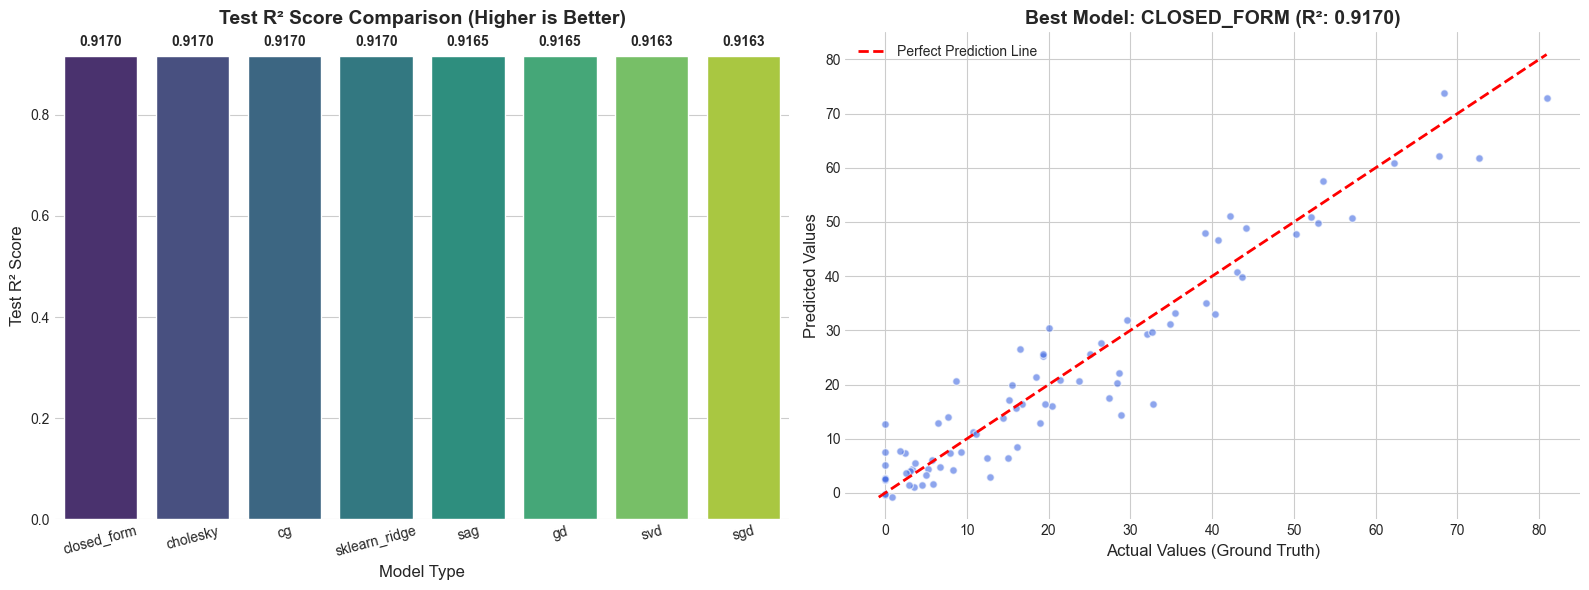

In [48]:
results_df, best_models = test_all_ridge_models(
    x_train,       
    y_train, 
    x_test,        
    y_test, 
    preprocessor=smart_preprocessor,
    ridgecv_alpha=best_ridgecv_alpha
)

# Visualisasi
fig = visualize_ridge_results(results_df, best_models, x_test, y_test)

# Feature Importance

In [49]:
def get_feature_names(preprocessor):
    output_features = []
    
    for name, transformer, cols in preprocessor.transformers_:
        if name == 'remainder' and transformer == 'drop':
            continue
        if name == 'num':
            # Need to get feature names from PolynomialFeatures
            poly = transformer.named_steps['poly']
            try:
                poly_names = poly.get_feature_names_out(cols)
                output_features.extend(poly_names)
            except:
                # Fallback for older sklearn
                output_features.extend(cols) 
                print("Warning: Could not get polynomial feature names. Using original names.")
        elif name == 'cat':
            try:
                cat_names = transformer.get_feature_names_out(cols)
                output_features.extend(cat_names)
            except:
                output_features.extend(cols)
        else:
            output_features.extend(cols)
            
    return output_features

In [50]:
best_model_name = results_df.iloc[0]['model_type']
best_r2 = results_df.iloc[0]['test_r2']
best_pipe = best_models[best_model_name]

print(f"Model Terbaik: {best_model_name.upper()} (R2: {best_r2:.6f})")

# ==========================================
# 1. BONGKAR "RUSSIAN DOLL" PIPELINE
# ==========================================
# Masuk ke dalam step 'preprocessor' untuk mengakses Smart Preprocessor
inner_pipe = best_pipe.named_steps['preprocessor']

# Sekarang baru kita bisa ambil komponen-komponennya dari dalam inner_pipe
prep_step = inner_pipe.named_steps['prepare_data']         # ColumnTransformer
selector_step = inner_pipe.named_steps['feature_selection'] # Lasso Selection
final_model = best_pipe.named_steps['model']               # Ridge Model (Perhatikan namanya 'model' sesuai fungsi Anda)

# ==========================================
# 2. EXTRACT NAMA FITUR
# ==========================================
# A. Ambil semua nama fitur (misal 50 fitur)
all_feature_names = prep_step.get_feature_names_out()

# B. Ambil Masker Seleksi dari Lasso
selected_mask = selector_step.get_support()

# C. Filter nama fitur (misal sisa 30 fitur)
final_feature_names = all_feature_names[selected_mask]

print(f"Fitur Awal    : {len(all_feature_names)}")
print(f"Fitur Akhir   : {len(final_feature_names)}")

# ==========================================
# 3. TRANSFORMASI DATA TEST (Cara Pintar)
# ==========================================
# Karena 'inner_pipe' (smart_preprocessor) sudah berisi urutan lengkap:
# Cleaner -> Preprocessor -> Scaler -> Selector
# Kita cukup panggil .transform() sekali saja pada inner_pipe!
print("\nMentransformasi data test...")
x_test_ready = inner_pipe.transform(x_test)

# ==========================================
# 4. HITUNG PERMUTATION IMPORTANCE
# ==========================================
print("Menghitung Feature Importance...")
result = permutation_importance(
    final_model,         # Hanya bagian model (Ridge)
    x_test_ready,        # Data yang sudah bersih & terseleksi
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean

# Validasi dimensi
if len(final_feature_names) != len(importances):
    print(f"FATAL ERROR: Dimensi tidak cocok! Nama Fitur: {len(final_feature_names)}, Skor: {len(importances)}")
else:
    print("SUKSES: Dimensi cocok.")

# ==========================================
# 5. SIMPAN HASIL
# ==========================================
feature_importance = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n=== Top 10 Most Important Features ===")
print(feature_importance.head(10))

# Save Artifacts
output_folder = 'artifacts'
os.makedirs(output_folder, exist_ok=True)

feature_importance.to_csv(os.path.join(output_folder, 'feature_importance.csv'), index=False)

# Simpan Model Utuh
with open(os.path.join(output_folder, 'model.pkl'), 'wb') as file:
    pkl.dump(best_pipe, file)

print("\nArtifacts berhasil disimpan.")

Model Terbaik: CLOSED_FORM (R2: 0.916980)
Fitur Awal    : 62
Fitur Akhir   : 11

Mentransformasi data test...
Menghitung Feature Importance...
SUKSES: Dimensi cocok.

=== Top 10 Most Important Features ===
                                          Feature  Importance
1                          num__stress_level_0_10    0.294643
2                         num__productivity_0_100    0.148850
7                        num__sleep_quality_1_5^2    0.133784
9       num__stress_level_0_10 productivity_0_100    0.048607
3                  num__exercise_minutes_per_week    0.017966
8                        num__stress_level_0_10^2    0.005942
6             num__sleep_hours productivity_0_100    0.003336
0                                num__sleep_hours    0.002303
10  num__productivity_0_100 social_hours_per_week   -0.001602
4                            num__age sleep_hours   -0.001879

Artifacts berhasil disimpan.


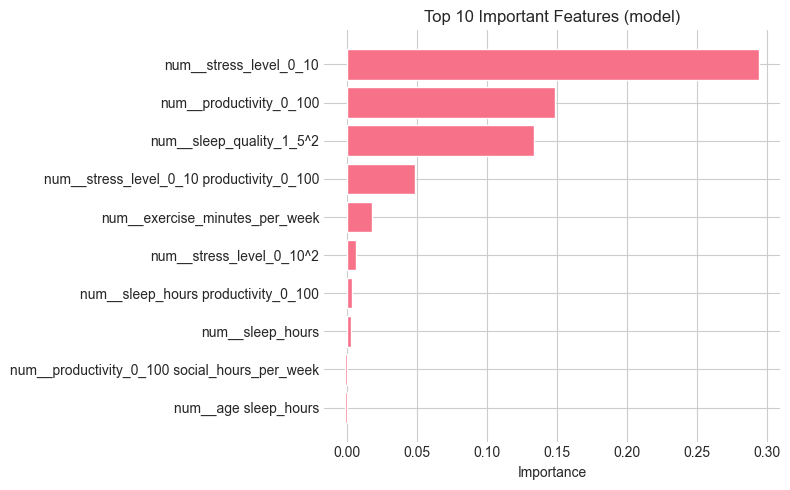

In [51]:
top_n = 10
plt.figure(figsize=(8, 5))
plt.barh(
    feature_importance['Feature'].head(top_n)[::-1],
    feature_importance['Importance'].head(top_n)[::-1]
)
plt.xlabel("Importance")
plt.title(f"Top {top_n} Important Features (model)")
plt.tight_layout()
plt.show()

In [52]:
# ==========================================
# 1. SETUP (Sama seperti sebelumnya)
# ==========================================
best_model_name = results_df.iloc[0]['model_type']
best_pipe = best_models[best_model_name]

print(f"Extracting Coefficients for: {best_model_name.upper()}")

# Masuk ke dalam nested pipeline
inner_pipe = best_pipe.named_steps['preprocessor']
prep_step = inner_pipe.named_steps['prepare_data']
selector_step = inner_pipe.named_steps['feature_selection']
final_model = best_pipe.named_steps['model']

# ==========================================
# 2. MATCHING NAMES TO COEFFICIENTS
# ==========================================
# A. Ambil nama fitur yang lolos seleksi (Logic yang sama)
all_names = prep_step.get_feature_names_out()
selected_mask = selector_step.get_support()
final_names = all_names[selected_mask]

# B. Ambil Coefficients dari Model
# .flatten() digunakan untuk memastikan bentuknya array 1 dimensi (bukan matriks)
coefficients = final_model.coef_.flatten()
intercept = final_model.intercept_

# Validasi
if len(final_names) != len(coefficients):
    print(f"ERROR: Mismatch! Features: {len(final_names)}, Coefs: {len(coefficients)}")
else:
    print(f"SUCCESS: Matched {len(coefficients)} coefficients.")

# ==========================================
# 3. CREATE DATAFRAME
# ==========================================
coef_df = pd.DataFrame({
    'Feature': final_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients) # Membantu sorting berdasarkan dampak terbesar
})

# Sortir berdasarkan kekuatan impact (Absolute value), tapi tetap tampilkan arah (+/-)
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(f"\nModel Intercept (Bias): {intercept:.4f}")
print("\n=== Top 10 Coefficients (Direction & Strength) ===")
print(coef_df[['Feature', 'Coefficient']].head(10))

# ==========================================
# 4. SIMPAN HASIL
# ==========================================
output_folder = 'artifacts'
os.makedirs(output_folder, exist_ok=True)

save_path = os.path.join(output_folder, 'model_coefficients.csv')
coef_df.to_csv(save_path, index=False)
print(f"\nCoefficients saved to: {save_path}")

Extracting Coefficients for: CLOSED_FORM
SUCCESS: Matched 11 coefficients.

Model Intercept (Bias): 19.8725

=== Top 10 Coefficients (Direction & Strength) ===
                                          Feature  Coefficient
1                          num__stress_level_0_10    -7.559194
2                         num__productivity_0_100     5.984100
7                        num__sleep_quality_1_5^2     4.642089
9       num__stress_level_0_10 productivity_0_100    -3.305898
3                  num__exercise_minutes_per_week     1.357170
8                        num__stress_level_0_10^2     0.867041
4                            num__age sleep_hours    -0.706566
5     num__work_screen_hours leisure_screen_hours     0.657555
6             num__sleep_hours productivity_0_100     0.611201
10  num__productivity_0_100 social_hours_per_week     0.579408

Coefficients saved to: artifacts\model_coefficients.csv


In [53]:
# -----------------------------------------------------------
# RUN THIS IN YOUR NOTEBOOK TO VERIFY THE SAVED FILE
# -----------------------------------------------------------

# 1. Define the path (same as your export)
pkl_path = os.path.join('artifacts', 'model.pkl')

print(f"Checking file at: {pkl_path}...")

if os.path.exists(pkl_path):
    print("File exists. Attempting to load...")
    
    # 2. Try to load it back
    try:
        with open(pkl_path, 'rb') as f:
            loaded_pipe = pkl.load(f)
        
        print("Model loaded successfully!")
        
        # 3. Optional: Test with one row of data (reuse your x_test)
        # This confirms the pipeline structure is intact
        try:
            sample_prediction = loaded_pipe.predict(x_test.iloc[0:1])
            print(f"Verification Prediction successful: {sample_prediction}")
            print("Your model.pkl is safe and ready for the API.")
        except Exception as e:
            print(f"Model loaded, but prediction failed: {e}")
            
    except Exception as e:
        print(f"Failed to load model: {e}")
else:
    print("File not found. Did the export cell run completely?")

Checking file at: artifacts\model.pkl...
File exists. Attempting to load...
Model loaded successfully!
Verification Prediction successful: [-0.29771248]
Your model.pkl is safe and ready for the API.


In [54]:

test_df = df.copy()
if 'user_id' in test_df.columns:
    test_df = test_df.drop('user_id', axis=1)
    print("Dropped 'user_id' column")
else:
    print("'user_id' column not found")

# 1. Inspect the DataFrame's structure
print("\nData Types:")
print(test_df.dtypes)

# 2. Identify non-numeric columns automatically
non_numeric_df = test_df.select_dtypes(exclude=['number'])
print(f"\nNon-numeric columns: {non_numeric_df.columns.tolist()}")

# 3. Show unique values for all non-numeric columns
print("\nUnique values in non-numeric columns:")
for column in non_numeric_df.columns:
    unique_vals = test_df[column].unique()
    print(f"{column}: {unique_vals}")

# 4. Get a quick count of unique values for all columns
print("\nCount of unique values in each column:")
print(test_df.nunique())

Dropped 'user_id' column

Data Types:
age                              int64
gender                          object
occupation                      object
work_mode                       object
screen_time_hours              float64
work_screen_hours              float64
leisure_screen_hours           float64
sleep_hours                    float64
sleep_quality_1_5                int64
stress_level_0_10              float64
productivity_0_100             float64
exercise_minutes_per_week        int64
social_hours_per_week          float64
mental_wellness_index_0_100    float64
dtype: object

Non-numeric columns: ['gender', 'occupation', 'work_mode']

Unique values in non-numeric columns:
gender: ['Female' 'Male' 'Non-binary/Other']
occupation: ['Employed' 'Student' 'Self-employed' 'Retired' 'Unemployed']
work_mode: ['Remote' 'In-person' 'Hybrid' 'Unemployed']

Count of unique values in each column:
age                             36
gender                           3
occupation        

In [55]:
print(coef_df[['Feature', 'Coefficient']])
print(feature_importance[['Feature', 'Importance']])


                                          Feature  Coefficient
1                          num__stress_level_0_10    -7.559194
2                         num__productivity_0_100     5.984100
7                        num__sleep_quality_1_5^2     4.642089
9       num__stress_level_0_10 productivity_0_100    -3.305898
3                  num__exercise_minutes_per_week     1.357170
8                        num__stress_level_0_10^2     0.867041
4                            num__age sleep_hours    -0.706566
5     num__work_screen_hours leisure_screen_hours     0.657555
6             num__sleep_hours productivity_0_100     0.611201
10  num__productivity_0_100 social_hours_per_week     0.579408
0                                num__sleep_hours     0.559425
                                          Feature  Importance
1                          num__stress_level_0_10    0.294643
2                         num__productivity_0_100    0.148850
7                        num__sleep_quality_1_5^2    0.133

In [56]:
# ==========================================
# SAVE PREPROCESSOR PIPELINE ONLY
# ==========================================
# This saves only the preprocessing pipeline without the model
# Useful for transforming raw input to processed features

# Extract the inner preprocessor from the best model
best_model_name = results_df.iloc[0]['model_type']
best_pipe = best_models[best_model_name]
inner_pipe = best_pipe.named_steps['preprocessor']

# Save preprocessor to artifacts
output_folder = 'artifacts'
os.makedirs(output_folder, exist_ok=True)

preprocessor_path = os.path.join(output_folder, 'preprocessor.pkl')
with open(preprocessor_path, 'wb') as file:
    pkl.dump(inner_pipe, file)

print(f"Preprocessor pipeline saved to: {preprocessor_path}")
print("\nThis pipeline includes:")
print("  1. Cleaner (occupation binning)")
print("  2. Preprocessor (Yeo-Johnson + Polynomial + OneHotEncoder)")
print("  3. Global Scaler (StandardScaler)")
print("  4. Feature Selection (Lasso-based)")
print("\nUse this to transform raw input to processed features without prediction.")

Preprocessor pipeline saved to: artifacts\preprocessor.pkl

This pipeline includes:
  1. Cleaner (occupation binning)
  2. Preprocessor (Yeo-Johnson + Polynomial + OneHotEncoder)
  3. Global Scaler (StandardScaler)
  4. Feature Selection (Lasso-based)

Use this to transform raw input to processed features without prediction.
